In [1]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import numpy as np

Instructions for updating:
non-resource variables are not supported in the long term


In [2]:
data = np.loadtxt("C:/000/ThoraricSurgery.csv", delimiter=",", dtype=np.float32)

x_data = data[:,0:-1]

y_data  = data[:,[-1]]


X = tf.placeholder(tf.float32,[None,17])
Y = tf.placeholder(tf.float32,[None,1])

W1 = tf.Variable(tf.random_normal([17,30]), dtype=tf.float32)
b1 = tf.Variable(tf.random_normal([30]), dtype=tf.float32)
layer1 = tf.sigmoid(tf.matmul(X,W1) + b1)


W2 = tf.Variable(tf.random_normal([30,1]), dtype=tf.float32)
b2 = tf.Variable(tf.random_normal([1]), dtype=tf.float32)

learning_rate = 0.04

hypothesis= tf.sigmoid(tf.matmul(layer1,W2) + b2)


cost =-tf.reduce_mean(Y * tf.log(hypothesis) + (1 -Y) * tf.log(1 - hypothesis))
train = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)


predicted = tf.cast(hypothesis > 0.5, dtype = tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype = tf.float32))

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for i in range(10001):
        cost_val,_ = sess.run([cost,train],feed_dict={X:x_data, Y:y_data})
        if i % 8000 == 0:
            print("i = ",i,
                  "cost =",sess.run(cost,feed_dict={X:x_data, Y:y_data}),
                                   "W =",sess.run(W1),"b= ",sess.run(b1))
            
    h, c, a = sess.run([hypothesis, predicted, accuracy],
                      feed_dict={X:x_data, Y:y_data})
    print("\nHypothesis:",h, "\nCorrect:",c,"\nAccuracy:",a)

i =  0 cost = 0.89293253 W = [[-1.54051498e-01  1.79652750e-01  9.83383834e-01 -9.14925694e-01
   8.98990631e-01 -7.79107332e-01 -2.13849381e-01 -1.87298879e-01
   1.07488441e+00 -9.50832546e-01 -1.28606331e+00 -1.18928885e+00
   5.65570772e-01  1.18116248e+00  1.01603544e+00 -1.04398990e+00
   1.74435958e-01  1.27517712e+00  1.54663116e-01 -5.02887189e-01
  -3.93449664e-01  1.84618104e+00  2.16865450e-01  6.65263414e-01
  -2.86262333e-01 -4.00308073e-01 -9.03159380e-01 -1.22977354e-01
  -1.17841029e+00 -7.15287745e-01]
 [-1.39821649e-01  1.36333978e+00  2.20716044e-01 -5.21734059e-01
   1.21426761e+00  9.58302319e-01 -2.11566949e+00  5.79481065e-01
   3.22402418e-01  7.55479783e-02 -1.50701118e+00 -4.23628837e-01
   2.05583334e+00  7.01224387e-01 -6.12105355e-02 -1.45995140e+00
   1.76878810e-01 -6.50063932e-01 -2.01101637e+00 -3.89796883e-01
   2.14952424e-01 -7.00217605e-01 -5.00431120e-01  3.80933344e-01
   9.32524920e-01  1.36747867e-01 -4.37552407e-02 -7.69582927e-01
  -1.1308690

i =  8000 cost = 0.40100953 W = [[-1.54051498e-01  4.35390919e-02  1.21521962e+00 -7.74755120e-01
   8.98990631e-01 -7.79107332e-01 -2.18685105e-01 -5.47488406e-03
   1.07488441e+00 -1.20629883e+00 -1.37197423e+00 -1.17262316e+00
   5.65570772e-01  1.18803465e+00  1.08918035e+00 -1.11958742e+00
   1.18096277e-01  1.27517712e+00  7.19078928e-02 -5.95700681e-01
  -3.93796563e-01  1.84618104e+00  2.16865450e-01  6.73514426e-01
  -2.86262333e-01 -3.60522300e-01 -9.03159380e-01 -2.38704741e-01
  -1.20360231e+00 -7.27674246e-01]
 [-1.39821649e-01  1.37878752e+00  2.23168507e-02 -5.05679369e-01
   1.21426761e+00  9.58302319e-01 -2.22665858e+00  5.81363440e-01
   3.22402418e-01 -4.79271226e-02 -1.47552490e+00 -4.16164964e-01
   2.05583334e+00  7.02538013e-01  1.06073953e-02 -1.43586576e+00
   1.81644753e-01 -6.50063932e-01 -2.01279092e+00 -4.51708376e-01
   2.14833647e-01 -7.00217605e-01 -5.00431120e-01  2.54965037e-01
   9.32524920e-01  2.60538250e-01 -4.37552407e-02 -7.11885750e-01
  -1.1227


Hypothesis: [[0.1678487 ]
 [0.01382089]
 [0.20048746]
 [0.20679739]
 [0.19552556]
 [0.20277539]
 [0.30862314]
 [0.2985641 ]
 [0.22109774]
 [0.1701358 ]
 [0.1213311 ]
 [0.17104512]
 [0.16784266]
 [0.17104512]
 [0.15764219]
 [0.16727021]
 [0.07977861]
 [0.06705678]
 [0.07220697]
 [0.1678487 ]
 [0.1678487 ]
 [0.16784859]
 [0.1678487 ]
 [0.1678487 ]
 [0.1678487 ]
 [0.1678487 ]
 [0.1678487 ]
 [0.1678487 ]
 [0.1678487 ]
 [0.1678487 ]
 [0.16777426]
 [0.1678487 ]
 [0.1678487 ]
 [0.09282255]
 [0.1676597 ]
 [0.01162261]
 [0.1678347 ]
 [0.16784728]
 [0.05001462]
 [0.13126907]
 [0.13448033]
 [0.13448331]
 [0.13780618]
 [0.13448933]
 [0.04991978]
 [0.13447514]
 [0.1344873 ]
 [0.05043879]
 [0.1316658 ]
 [0.13448933]
 [0.13448948]
 [0.13448468]
 [0.13448948]
 [0.04059473]
 [0.09734094]
 [0.06444767]
 [0.20080951]
 [0.14821002]
 [0.17977804]
 [0.20881456]
 [0.19815996]
 [0.1985263 ]
 [0.08904573]
 [0.21027085]
 [0.21061933]
 [0.15638638]
 [0.21046418]
 [0.21079081]
 [0.10595083]
 [0.21523464]
 [0.234

In [3]:
data = np.loadtxt("C:/000/ThoraricSurgery.csv", delimiter=",", dtype=np.float32)

#환자의 기록과 수술 결과를 x와 y 로 구분하여 저장
x_data = data[:,0:-1]
y_data  = data[:,[-1]]

#Placeholders : shape주의!chd 17rodml x_data 와 1rodml y_data
X = tf.placeholder(tf.float32,[None,17])
Y = tf.placeholder(tf.float32,[None,1])

W1 = tf.Variable(tf.random_normal([17,30]), dtype=tf.float32)
b1 = tf.Variable(tf.random_normal([30]), dtype=tf.float32)
layer1 = tf.sigmoid(tf.matmul(X,W1) + b1)

W2 = tf.Variable(tf.random_normal([30,1]), dtype=tf.float32)
b2 = tf.Variable(tf.random_normal([1]), dtype=tf.float32)

learning_rate = 0.04

hypothesis= tf.sigmoid(tf.matmul(layer1,W2) + b2)

#nn.relu 사용가능

cost =-tf.reduce_mean(Y * tf.log(hypothesis) + (1 -Y) * tf.log(1 - hypothesis))
train = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)


predicted = tf.cast(hypothesis > 0.5, dtype = tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype = tf.float32))

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for i in range(10001):
        cost_val,train_val = sess.run([cost,train],feed_dict={X:x_data, Y:y_data})
        if i % 8000 == 0:
            print("i = ",i,
                  "cost =",sess.run(cost,feed_dict={X:x_data, Y:y_data}),
                                   "W =",sess.run(W1),"b= ",sess.run(b1))
            
    a = sess.run([accuracy], feed_dict={X:x_data, Y:y_data})
    
    print(a)

i =  0 cost = 2.5213509 W = [[ 0.6989074   0.07110697 -1.1449876   0.9531641  -0.4018494   2.1869552
   1.147071   -0.22878     1.1151562  -0.322789    0.7266432  -0.7982384
  -0.9497954  -0.0547571   2.6457496  -0.24701966  0.5409434   0.12199438
  -0.46493715  0.3360616   1.575712   -0.69209397  0.87899184  0.22346833
   2.4624503  -1.0931581  -0.8481152  -0.99779004  0.9364005   0.0605819 ]
 [ 0.55770415 -0.58483595 -0.36914802 -0.17713526  0.20393881 -0.5008612
  -2.5895314   0.8384772  -0.14265454 -1.0199248  -1.2444423   0.5673491
   1.2813871   1.6763506   0.90706575  0.02585867  0.18648244  0.547696
   0.5270908   0.42560583  0.5551193  -1.5971457   1.071842    0.19101791
  -0.3176716   0.44236147  0.19930907 -0.36149248 -0.7583752   1.3394017 ]
 [ 0.35867363  0.893027   -0.20594802  0.5272046  -0.8183581  -0.3343099
   1.8949528   0.00706382  0.49295288 -0.07300907 -0.9421835  -0.04746766
   0.4376968  -0.7824276  -0.7541492   0.62559587 -1.5823184  -2.8302588
   0.476857   -0

[0.85531914]


In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np
import tensorflow as tf

seed=0
np.random.seed(seed)
tf.random.set_seed(seed)

#준비된 수술환자 데이터를 불러 들입니다.
Data_set = np.loadtxt("C:/000/ThoraricSurgery.csv", delimiter=",", dtype=np.float32)

#환자의 기록과 수술 결과를 X 와 Y로 구분하여 저장합니다.
X = Data_set[:,0:17]
Y = Data_set[:,17]

#딥러닝 구조를 결정합니다.(모델을 설정하고 실행하는 부분입니다.)
model = Sequential()
model.add(Dense(30,input_dim = 17, activation="sigmoid"))
model.add(Dense(1, activation="sigmoid"))

#딥러닝을 실행합니다.
model.compile(loss = "binary_crossentropy", optimizer="adam",metrics=["accuracy"])
model.fit(X,Y,epochs=3000, batch_size=10)

#결과를 출력합니다
print("\n Accuracy:%.4f" % (model.evaluate(X,Y)[1]))

Train on 470 samples
Epoch 1/3000
470/470 [==============================] - 0s 311us/sample - loss: 1.0787 - acc: 0.1638
Epoch 2/3000
470/470 [==============================] - 0s 158us/sample - loss: 0.7113 - acc: 0.3936
Epoch 3/3000
470/470 [==============================] - 0s 156us/sample - loss: 0.5818 - acc: 0.8511
Epoch 4/3000
470/470 [==============================] - 0s 160us/sample - loss: 0.5161 - acc: 0.8511
Epoch 5/3000
470/470 [==============================] - 0s 130us/sample - loss: 0.4782 - acc: 0.8511
Epoch 6/3000
470/470 [==============================] - 0s 126us/sample - loss: 0.4547 - acc: 0.8511
Epoch 7/3000
470/470 [==============================] - 0s 112us/sample - loss: 0.4373 - acc: 0.8511
Epoch 8/3000
470/470 [==============================] - 0s 108us/sample - loss: 0.4323 - acc: 0.8511
Epoch 9/3000
470/470 [==============================] - 0s 112us/sample - loss: 0.4290 - acc: 0.8511
Epoch 10/3000
470/470 [==============================] - 0s 108us/samp

470/470 [==============================] - 0s 107us/sample - loss: 0.4053 - acc: 0.8511
Epoch 82/3000
470/470 [==============================] - 0s 102us/sample - loss: 0.4065 - acc: 0.8511
Epoch 83/3000
470/470 [==============================] - 0s 100us/sample - loss: 0.4061 - acc: 0.8511
Epoch 84/3000
470/470 [==============================] - 0s 100us/sample - loss: 0.4054 - acc: 0.8511
Epoch 85/3000
470/470 [==============================] - 0s 95us/sample - loss: 0.4050 - acc: 0.8511
Epoch 86/3000
470/470 [==============================] - 0s 95us/sample - loss: 0.4054 - acc: 0.8511
Epoch 87/3000
470/470 [==============================] - 0s 112us/sample - loss: 0.4040 - acc: 0.8511
Epoch 88/3000
470/470 [==============================] - 0s 125us/sample - loss: 0.4042 - acc: 0.8511
Epoch 89/3000
470/470 [==============================] - 0s 116us/sample - loss: 0.4047 - acc: 0.8511
Epoch 90/3000
470/470 [==============================] - 0s 101us/sample - loss: 0.4046 - acc: 0.8

470/470 [==============================] - 0s 100us/sample - loss: 0.3803 - acc: 0.8574
Epoch 161/3000
470/470 [==============================] - 0s 96us/sample - loss: 0.3824 - acc: 0.8553
Epoch 162/3000
470/470 [==============================] - 0s 105us/sample - loss: 0.3805 - acc: 0.8553
Epoch 163/3000
470/470 [==============================] - 0s 105us/sample - loss: 0.3809 - acc: 0.8553
Epoch 164/3000
470/470 [==============================] - 0s 106us/sample - loss: 0.3812 - acc: 0.8553
Epoch 165/3000
470/470 [==============================] - 0s 102us/sample - loss: 0.3781 - acc: 0.8553
Epoch 166/3000
470/470 [==============================] - 0s 103us/sample - loss: 0.3790 - acc: 0.8553
Epoch 167/3000
470/470 [==============================] - 0s 116us/sample - loss: 0.3794 - acc: 0.8532
Epoch 168/3000
470/470 [==============================] - 0s 106us/sample - loss: 0.3766 - acc: 0.8553
Epoch 169/3000
470/470 [==============================] - 0s 118us/sample - loss: 0.3816 

470/470 [==============================] - 0s 103us/sample - loss: 0.3614 - acc: 0.8574
Epoch 240/3000
470/470 [==============================] - 0s 104us/sample - loss: 0.3600 - acc: 0.8617
Epoch 241/3000
470/470 [==============================] - 0s 97us/sample - loss: 0.3565 - acc: 0.8596
Epoch 242/3000
470/470 [==============================] - 0s 95us/sample - loss: 0.3567 - acc: 0.8638
Epoch 243/3000
470/470 [==============================] - 0s 104us/sample - loss: 0.3566 - acc: 0.8553
Epoch 244/3000
470/470 [==============================] - 0s 103us/sample - loss: 0.3562 - acc: 0.8617
Epoch 245/3000
470/470 [==============================] - 0s 101us/sample - loss: 0.3531 - acc: 0.8617
Epoch 246/3000
470/470 [==============================] - 0s 102us/sample - loss: 0.3567 - acc: 0.8596
Epoch 247/3000
470/470 [==============================] - 0s 97us/sample - loss: 0.3559 - acc: 0.8638
Epoch 248/3000
470/470 [==============================] - 0s 100us/sample - loss: 0.3565 - 

470/470 [==============================] - 0s 104us/sample - loss: 0.3370 - acc: 0.8681
Epoch 319/3000
470/470 [==============================] - 0s 108us/sample - loss: 0.3381 - acc: 0.8745
Epoch 320/3000
470/470 [==============================] - 0s 114us/sample - loss: 0.3358 - acc: 0.8617
Epoch 321/3000
470/470 [==============================] - 0s 109us/sample - loss: 0.3380 - acc: 0.8617
Epoch 322/3000
470/470 [==============================] - 0s 103us/sample - loss: 0.3325 - acc: 0.8660
Epoch 323/3000
470/470 [==============================] - 0s 108us/sample - loss: 0.3393 - acc: 0.8681
Epoch 324/3000
470/470 [==============================] - 0s 106us/sample - loss: 0.3337 - acc: 0.8660
Epoch 325/3000
470/470 [==============================] - 0s 109us/sample - loss: 0.3373 - acc: 0.8702
Epoch 326/3000
470/470 [==============================] - 0s 139us/sample - loss: 0.3365 - acc: 0.8702
Epoch 327/3000
470/470 [==============================] - 0s 104us/sample - loss: 0.3340

470/470 [==============================] - 0s 92us/sample - loss: 0.3240 - acc: 0.8766
Epoch 399/3000
470/470 [==============================] - 0s 108us/sample - loss: 0.3249 - acc: 0.8745
Epoch 400/3000
470/470 [==============================] - 0s 126us/sample - loss: 0.3238 - acc: 0.8766
Epoch 401/3000
470/470 [==============================] - 0s 117us/sample - loss: 0.3177 - acc: 0.8787
Epoch 402/3000
470/470 [==============================] - 0s 101us/sample - loss: 0.3256 - acc: 0.8702
Epoch 403/3000
470/470 [==============================] - 0s 94us/sample - loss: 0.3256 - acc: 0.8745
Epoch 404/3000
470/470 [==============================] - 0s 96us/sample - loss: 0.3198 - acc: 0.8787
Epoch 405/3000
470/470 [==============================] - 0s 94us/sample - loss: 0.3156 - acc: 0.8745
Epoch 406/3000
470/470 [==============================] - 0s 103us/sample - loss: 0.3251 - acc: 0.8745
Epoch 407/3000
470/470 [==============================] - 0s 100us/sample - loss: 0.3192 - a

470/470 [==============================] - 0s 93us/sample - loss: 0.3075 - acc: 0.8809
Epoch 479/3000
470/470 [==============================] - 0s 97us/sample - loss: 0.3081 - acc: 0.8830
Epoch 480/3000
470/470 [==============================] - 0s 96us/sample - loss: 0.3074 - acc: 0.8809
Epoch 481/3000
470/470 [==============================] - 0s 93us/sample - loss: 0.3088 - acc: 0.8851
Epoch 482/3000
470/470 [==============================] - 0s 97us/sample - loss: 0.3052 - acc: 0.8830
Epoch 483/3000
470/470 [==============================] - 0s 92us/sample - loss: 0.3074 - acc: 0.8851
Epoch 484/3000
470/470 [==============================] - 0s 94us/sample - loss: 0.3083 - acc: 0.8830
Epoch 485/3000
470/470 [==============================] - 0s 99us/sample - loss: 0.3083 - acc: 0.8851
Epoch 486/3000
470/470 [==============================] - 0s 109us/sample - loss: 0.3066 - acc: 0.8872
Epoch 487/3000
470/470 [==============================] - 0s 109us/sample - loss: 0.3070 - acc: 

470/470 [==============================] - 0s 97us/sample - loss: 0.2983 - acc: 0.8894
Epoch 558/3000
470/470 [==============================] - 0s 101us/sample - loss: 0.2970 - acc: 0.8915
Epoch 559/3000
470/470 [==============================] - 0s 102us/sample - loss: 0.3006 - acc: 0.8894
Epoch 560/3000
470/470 [==============================] - 0s 109us/sample - loss: 0.2992 - acc: 0.8830
Epoch 561/3000
470/470 [==============================] - 0s 99us/sample - loss: 0.3008 - acc: 0.8851
Epoch 562/3000
470/470 [==============================] - 0s 108us/sample - loss: 0.2970 - acc: 0.8894
Epoch 563/3000
470/470 [==============================] - 0s 126us/sample - loss: 0.2992 - acc: 0.8872
Epoch 564/3000
470/470 [==============================] - 0s 113us/sample - loss: 0.2935 - acc: 0.8936
Epoch 565/3000
470/470 [==============================] - 0s 110us/sample - loss: 0.3004 - acc: 0.8894
Epoch 566/3000
470/470 [==============================] - 0s 99us/sample - loss: 0.2967 - 

470/470 [==============================] - 0s 103us/sample - loss: 0.2907 - acc: 0.8915
Epoch 637/3000
470/470 [==============================] - 0s 97us/sample - loss: 0.2874 - acc: 0.8894
Epoch 638/3000
470/470 [==============================] - 0s 93us/sample - loss: 0.2943 - acc: 0.8851
Epoch 639/3000
470/470 [==============================] - 0s 104us/sample - loss: 0.2975 - acc: 0.8851
Epoch 640/3000
470/470 [==============================] - 0s 110us/sample - loss: 0.2953 - acc: 0.8894
Epoch 641/3000
470/470 [==============================] - 0s 99us/sample - loss: 0.2895 - acc: 0.8915
Epoch 642/3000
470/470 [==============================] - 0s 103us/sample - loss: 0.2944 - acc: 0.8936
Epoch 643/3000
470/470 [==============================] - 0s 96us/sample - loss: 0.2893 - acc: 0.8894
Epoch 644/3000
470/470 [==============================] - 0s 94us/sample - loss: 0.2886 - acc: 0.8915
Epoch 645/3000
470/470 [==============================] - 0s 94us/sample - loss: 0.2891 - acc

470/470 [==============================] - 0s 90us/sample - loss: 0.2844 - acc: 0.8936
Epoch 717/3000
470/470 [==============================] - 0s 94us/sample - loss: 0.2870 - acc: 0.8957
Epoch 718/3000
470/470 [==============================] - 0s 93us/sample - loss: 0.2859 - acc: 0.8936
Epoch 719/3000
470/470 [==============================] - 0s 97us/sample - loss: 0.2854 - acc: 0.8872
Epoch 720/3000
470/470 [==============================] - 0s 95us/sample - loss: 0.2918 - acc: 0.8979
Epoch 721/3000
470/470 [==============================] - 0s 94us/sample - loss: 0.2796 - acc: 0.8936
Epoch 722/3000
470/470 [==============================] - 0s 103us/sample - loss: 0.2821 - acc: 0.8936
Epoch 723/3000
470/470 [==============================] - 0s 95us/sample - loss: 0.2845 - acc: 0.8957
Epoch 724/3000
470/470 [==============================] - 0s 99us/sample - loss: 0.2817 - acc: 0.8936
Epoch 725/3000
470/470 [==============================] - 0s 99us/sample - loss: 0.2820 - acc: 0

470/470 [==============================] - 0s 108us/sample - loss: 0.2768 - acc: 0.8936
Epoch 796/3000
470/470 [==============================] - 0s 104us/sample - loss: 0.2735 - acc: 0.8979
Epoch 797/3000
470/470 [==============================] - 0s 100us/sample - loss: 0.2765 - acc: 0.8957
Epoch 798/3000
470/470 [==============================] - 0s 100us/sample - loss: 0.2748 - acc: 0.8979
Epoch 799/3000
470/470 [==============================] - 0s 97us/sample - loss: 0.2763 - acc: 0.8957
Epoch 800/3000
470/470 [==============================] - 0s 96us/sample - loss: 0.2771 - acc: 0.8915
Epoch 801/3000
470/470 [==============================] - 0s 98us/sample - loss: 0.2770 - acc: 0.8957
Epoch 802/3000
470/470 [==============================] - 0s 93us/sample - loss: 0.2706 - acc: 0.8936
Epoch 803/3000
470/470 [==============================] - 0s 95us/sample - loss: 0.2792 - acc: 0.8936
Epoch 804/3000
470/470 [==============================] - 0s 98us/sample - loss: 0.2753 - acc

Epoch 875/3000
470/470 [==============================] - 0s 125us/sample - loss: 0.2678 - acc: 0.8894
Epoch 876/3000
470/470 [==============================] - 0s 113us/sample - loss: 0.2671 - acc: 0.8957
Epoch 877/3000
470/470 [==============================] - 0s 126us/sample - loss: 0.2701 - acc: 0.8957
Epoch 878/3000
470/470 [==============================] - 0s 113us/sample - loss: 0.2669 - acc: 0.8957
Epoch 879/3000
470/470 [==============================] - 0s 114us/sample - loss: 0.2704 - acc: 0.8936
Epoch 880/3000
470/470 [==============================] - 0s 110us/sample - loss: 0.2703 - acc: 0.8936
Epoch 881/3000
470/470 [==============================] - 0s 106us/sample - loss: 0.2682 - acc: 0.8957
Epoch 882/3000
470/470 [==============================] - 0s 102us/sample - loss: 0.2715 - acc: 0.9000
Epoch 883/3000
470/470 [==============================] - 0s 103us/sample - loss: 0.2680 - acc: 0.8957
Epoch 884/3000
470/470 [==============================] - 0s 108us/sample

470/470 [==============================] - 0s 103us/sample - loss: 0.2680 - acc: 0.8979
Epoch 955/3000
470/470 [==============================] - 0s 98us/sample - loss: 0.2648 - acc: 0.8957
Epoch 956/3000
470/470 [==============================] - 0s 98us/sample - loss: 0.2641 - acc: 0.8957
Epoch 957/3000
470/470 [==============================] - 0s 96us/sample - loss: 0.2615 - acc: 0.9021
Epoch 958/3000
470/470 [==============================] - 0s 98us/sample - loss: 0.2618 - acc: 0.9000
Epoch 959/3000
470/470 [==============================] - 0s 105us/sample - loss: 0.2627 - acc: 0.8979
Epoch 960/3000
470/470 [==============================] - 0s 105us/sample - loss: 0.2714 - acc: 0.9000
Epoch 961/3000
470/470 [==============================] - 0s 99us/sample - loss: 0.2631 - acc: 0.9021
Epoch 962/3000
470/470 [==============================] - 0s 104us/sample - loss: 0.2640 - acc: 0.9021
Epoch 963/3000
470/470 [==============================] - 0s 106us/sample - loss: 0.2659 - ac

470/470 [==============================] - 0s 95us/sample - loss: 0.2602 - acc: 0.8957
Epoch 1034/3000
470/470 [==============================] - 0s 104us/sample - loss: 0.2587 - acc: 0.8979
Epoch 1035/3000
470/470 [==============================] - 0s 93us/sample - loss: 0.2599 - acc: 0.9021
Epoch 1036/3000
470/470 [==============================] - 0s 102us/sample - loss: 0.2608 - acc: 0.8957
Epoch 1037/3000
470/470 [==============================] - 0s 97us/sample - loss: 0.2623 - acc: 0.8936
Epoch 1038/3000
470/470 [==============================] - 0s 90us/sample - loss: 0.2650 - acc: 0.9021
Epoch 1039/3000
470/470 [==============================] - 0s 96us/sample - loss: 0.2603 - acc: 0.8957
Epoch 1040/3000
470/470 [==============================] - 0s 95us/sample - loss: 0.2603 - acc: 0.8979
Epoch 1041/3000
470/470 [==============================] - 0s 98us/sample - loss: 0.2623 - acc: 0.9000
Epoch 1042/3000
470/470 [==============================] - 0s 96us/sample - loss: 0.268

470/470 [==============================] - 0s 95us/sample - loss: 0.2566 - acc: 0.9064
Epoch 1113/3000
470/470 [==============================] - 0s 100us/sample - loss: 0.2560 - acc: 0.8957
Epoch 1114/3000
470/470 [==============================] - 0s 99us/sample - loss: 0.2559 - acc: 0.8979
Epoch 1115/3000
470/470 [==============================] - 0s 105us/sample - loss: 0.2618 - acc: 0.9043
Epoch 1116/3000
470/470 [==============================] - 0s 98us/sample - loss: 0.2554 - acc: 0.8979
Epoch 1117/3000
470/470 [==============================] - 0s 98us/sample - loss: 0.2555 - acc: 0.8957
Epoch 1118/3000
470/470 [==============================] - 0s 96us/sample - loss: 0.2594 - acc: 0.8936
Epoch 1119/3000
470/470 [==============================] - 0s 96us/sample - loss: 0.2573 - acc: 0.8936
Epoch 1120/3000
470/470 [==============================] - 0s 104us/sample - loss: 0.2583 - acc: 0.8979
Epoch 1121/3000
470/470 [==============================] - 0s 101us/sample - loss: 0.2

470/470 [==============================] - 0s 104us/sample - loss: 0.2530 - acc: 0.9021
Epoch 1191/3000
470/470 [==============================] - 0s 94us/sample - loss: 0.2561 - acc: 0.9000
Epoch 1192/3000
470/470 [==============================] - 0s 100us/sample - loss: 0.2505 - acc: 0.9021
Epoch 1193/3000
470/470 [==============================] - 0s 99us/sample - loss: 0.2518 - acc: 0.9021
Epoch 1194/3000
470/470 [==============================] - 0s 91us/sample - loss: 0.2542 - acc: 0.8979
Epoch 1195/3000
470/470 [==============================] - 0s 99us/sample - loss: 0.2516 - acc: 0.8979
Epoch 1196/3000
470/470 [==============================] - 0s 104us/sample - loss: 0.2529 - acc: 0.9000
Epoch 1197/3000
470/470 [==============================] - 0s 96us/sample - loss: 0.2530 - acc: 0.8979
Epoch 1198/3000
470/470 [==============================] - 0s 103us/sample - loss: 0.2603 - acc: 0.9000
Epoch 1199/3000
470/470 [==============================] - 0s 101us/sample - loss: 0.

470/470 [==============================] - 0s 101us/sample - loss: 0.2514 - acc: 0.9000
Epoch 1270/3000
470/470 [==============================] - 0s 107us/sample - loss: 0.2470 - acc: 0.9000
Epoch 1271/3000
470/470 [==============================] - 0s 108us/sample - loss: 0.2557 - acc: 0.9021
Epoch 1272/3000
470/470 [==============================] - 0s 101us/sample - loss: 0.2512 - acc: 0.9000
Epoch 1273/3000
470/470 [==============================] - 0s 107us/sample - loss: 0.2475 - acc: 0.9021
Epoch 1274/3000
470/470 [==============================] - 0s 98us/sample - loss: 0.2506 - acc: 0.8957
Epoch 1275/3000
470/470 [==============================] - 0s 101us/sample - loss: 0.2478 - acc: 0.9021
Epoch 1276/3000
470/470 [==============================] - 0s 98us/sample - loss: 0.2520 - acc: 0.9021
Epoch 1277/3000
470/470 [==============================] - 0s 93us/sample - loss: 0.2509 - acc: 0.8957
Epoch 1278/3000
470/470 [==============================] - 0s 94us/sample - loss: 0

470/470 [==============================] - 0s 97us/sample - loss: 0.2435 - acc: 0.8979
Epoch 1348/3000
470/470 [==============================] - 0s 93us/sample - loss: 0.2444 - acc: 0.9000
Epoch 1349/3000
470/470 [==============================] - 0s 100us/sample - loss: 0.2439 - acc: 0.9000
Epoch 1350/3000
470/470 [==============================] - 0s 98us/sample - loss: 0.2444 - acc: 0.9021
Epoch 1351/3000
470/470 [==============================] - 0s 93us/sample - loss: 0.2492 - acc: 0.9043
Epoch 1352/3000
470/470 [==============================] - 0s 96us/sample - loss: 0.2453 - acc: 0.9021
Epoch 1353/3000
470/470 [==============================] - 0s 97us/sample - loss: 0.2480 - acc: 0.9000
Epoch 1354/3000
470/470 [==============================] - 0s 97us/sample - loss: 0.2486 - acc: 0.9021
Epoch 1355/3000
470/470 [==============================] - 0s 103us/sample - loss: 0.2451 - acc: 0.9000
Epoch 1356/3000
470/470 [==============================] - 0s 102us/sample - loss: 0.24

470/470 [==============================] - 0s 99us/sample - loss: 0.2389 - acc: 0.9021
Epoch 1426/3000
470/470 [==============================] - 0s 99us/sample - loss: 0.2396 - acc: 0.9064
Epoch 1427/3000
470/470 [==============================] - 0s 105us/sample - loss: 0.2456 - acc: 0.9043
Epoch 1428/3000
470/470 [==============================] - 0s 105us/sample - loss: 0.2407 - acc: 0.9043
Epoch 1429/3000
470/470 [==============================] - 0s 106us/sample - loss: 0.2402 - acc: 0.9043
Epoch 1430/3000
470/470 [==============================] - 0s 98us/sample - loss: 0.2381 - acc: 0.9085
Epoch 1431/3000
470/470 [==============================] - 0s 100us/sample - loss: 0.2446 - acc: 0.9043
Epoch 1432/3000
470/470 [==============================] - 0s 97us/sample - loss: 0.2419 - acc: 0.9021
Epoch 1433/3000
470/470 [==============================] - 0s 98us/sample - loss: 0.2393 - acc: 0.9064
Epoch 1434/3000
470/470 [==============================] - 0s 103us/sample - loss: 0.

470/470 [==============================] - 0s 105us/sample - loss: 0.2481 - acc: 0.9043
Epoch 1504/3000
470/470 [==============================] - 0s 95us/sample - loss: 0.2396 - acc: 0.9043
Epoch 1505/3000
470/470 [==============================] - 0s 99us/sample - loss: 0.2373 - acc: 0.9043
Epoch 1506/3000
470/470 [==============================] - 0s 91us/sample - loss: 0.2388 - acc: 0.9064
Epoch 1507/3000
470/470 [==============================] - 0s 97us/sample - loss: 0.2383 - acc: 0.9043
Epoch 1508/3000
470/470 [==============================] - 0s 93us/sample - loss: 0.2396 - acc: 0.9064
Epoch 1509/3000
470/470 [==============================] - 0s 89us/sample - loss: 0.2376 - acc: 0.9064
Epoch 1510/3000
470/470 [==============================] - 0s 96us/sample - loss: 0.2373 - acc: 0.9064
Epoch 1511/3000
470/470 [==============================] - 0s 91us/sample - loss: 0.2381 - acc: 0.9021
Epoch 1512/3000
470/470 [==============================] - 0s 99us/sample - loss: 0.2417

470/470 [==============================] - 0s 97us/sample - loss: 0.2362 - acc: 0.9085
Epoch 1583/3000
470/470 [==============================] - 0s 97us/sample - loss: 0.2376 - acc: 0.9064
Epoch 1584/3000
470/470 [==============================] - 0s 98us/sample - loss: 0.2343 - acc: 0.9064
Epoch 1585/3000
470/470 [==============================] - 0s 101us/sample - loss: 0.2340 - acc: 0.9106
Epoch 1586/3000
470/470 [==============================] - 0s 93us/sample - loss: 0.2344 - acc: 0.9106
Epoch 1587/3000
470/470 [==============================] - 0s 97us/sample - loss: 0.2333 - acc: 0.9106
Epoch 1588/3000
470/470 [==============================] - 0s 98us/sample - loss: 0.2393 - acc: 0.9021
Epoch 1589/3000
470/470 [==============================] - 0s 93us/sample - loss: 0.2338 - acc: 0.9106
Epoch 1590/3000
470/470 [==============================] - 0s 91us/sample - loss: 0.2372 - acc: 0.9085
Epoch 1591/3000
470/470 [==============================] - 0s 92us/sample - loss: 0.2349

470/470 [==============================] - 0s 99us/sample - loss: 0.2327 - acc: 0.9106
Epoch 1662/3000
470/470 [==============================] - 0s 104us/sample - loss: 0.2340 - acc: 0.9106
Epoch 1663/3000
470/470 [==============================] - 0s 97us/sample - loss: 0.2313 - acc: 0.9128
Epoch 1664/3000
470/470 [==============================] - 0s 102us/sample - loss: 0.2340 - acc: 0.9128
Epoch 1665/3000
470/470 [==============================] - 0s 93us/sample - loss: 0.2335 - acc: 0.9085
Epoch 1666/3000
470/470 [==============================] - 0s 98us/sample - loss: 0.2380 - acc: 0.9106
Epoch 1667/3000
470/470 [==============================] - 0s 102us/sample - loss: 0.2320 - acc: 0.9170
Epoch 1668/3000
470/470 [==============================] - 0s 100us/sample - loss: 0.2302 - acc: 0.9106
Epoch 1669/3000
470/470 [==============================] - 0s 96us/sample - loss: 0.2381 - acc: 0.9085
Epoch 1670/3000
470/470 [==============================] - 0s 103us/sample - loss: 0.

470/470 [==============================] - 0s 102us/sample - loss: 0.2345 - acc: 0.9085
Epoch 1741/3000
470/470 [==============================] - 0s 104us/sample - loss: 0.2298 - acc: 0.9106
Epoch 1742/3000
470/470 [==============================] - 0s 99us/sample - loss: 0.2284 - acc: 0.9106
Epoch 1743/3000
470/470 [==============================] - 0s 94us/sample - loss: 0.2293 - acc: 0.9106
Epoch 1744/3000
470/470 [==============================] - 0s 96us/sample - loss: 0.2308 - acc: 0.9106
Epoch 1745/3000
470/470 [==============================] - 0s 91us/sample - loss: 0.2270 - acc: 0.9128
Epoch 1746/3000
470/470 [==============================] - 0s 99us/sample - loss: 0.2278 - acc: 0.9149
Epoch 1747/3000
470/470 [==============================] - 0s 94us/sample - loss: 0.2283 - acc: 0.9149
Epoch 1748/3000
470/470 [==============================] - 0s 97us/sample - loss: 0.2342 - acc: 0.9106
Epoch 1749/3000
470/470 [==============================] - 0s 90us/sample - loss: 0.232

470/470 [==============================] - 0s 98us/sample - loss: 0.2260 - acc: 0.9170
Epoch 1820/3000
470/470 [==============================] - 0s 104us/sample - loss: 0.2254 - acc: 0.9128
Epoch 1821/3000
470/470 [==============================] - 0s 94us/sample - loss: 0.2272 - acc: 0.9149
Epoch 1822/3000
470/470 [==============================] - 0s 94us/sample - loss: 0.2247 - acc: 0.9149
Epoch 1823/3000
470/470 [==============================] - 0s 90us/sample - loss: 0.2265 - acc: 0.9149
Epoch 1824/3000
470/470 [==============================] - 0s 97us/sample - loss: 0.2296 - acc: 0.9085
Epoch 1825/3000
470/470 [==============================] - 0s 96us/sample - loss: 0.2266 - acc: 0.9191
Epoch 1826/3000
470/470 [==============================] - 0s 93us/sample - loss: 0.2243 - acc: 0.9191
Epoch 1827/3000
470/470 [==============================] - 0s 97us/sample - loss: 0.2239 - acc: 0.9128
Epoch 1828/3000
470/470 [==============================] - 0s 96us/sample - loss: 0.2255

470/470 [==============================] - 0s 97us/sample - loss: 0.2229 - acc: 0.9128
Epoch 1899/3000
470/470 [==============================] - 0s 94us/sample - loss: 0.2251 - acc: 0.9064
Epoch 1900/3000
470/470 [==============================] - 0s 103us/sample - loss: 0.2246 - acc: 0.9191
Epoch 1901/3000
470/470 [==============================] - 0s 105us/sample - loss: 0.2226 - acc: 0.9170
Epoch 1902/3000
470/470 [==============================] - 0s 96us/sample - loss: 0.2206 - acc: 0.9191
Epoch 1903/3000
470/470 [==============================] - 0s 96us/sample - loss: 0.2259 - acc: 0.9128
Epoch 1904/3000
470/470 [==============================] - 0s 102us/sample - loss: 0.2246 - acc: 0.9149
Epoch 1905/3000
470/470 [==============================] - 0s 103us/sample - loss: 0.2274 - acc: 0.9128
Epoch 1906/3000
470/470 [==============================] - 0s 98us/sample - loss: 0.2294 - acc: 0.9128
Epoch 1907/3000
470/470 [==============================] - 0s 94us/sample - loss: 0.2

470/470 [==============================] - 0s 101us/sample - loss: 0.2205 - acc: 0.9128
Epoch 1978/3000
470/470 [==============================] - 0s 102us/sample - loss: 0.2207 - acc: 0.9106
Epoch 1979/3000
470/470 [==============================] - 0s 104us/sample - loss: 0.2175 - acc: 0.9191
Epoch 1980/3000
470/470 [==============================] - 0s 105us/sample - loss: 0.2134 - acc: 0.9191
Epoch 1981/3000
470/470 [==============================] - 0s 97us/sample - loss: 0.2301 - acc: 0.9149
Epoch 1982/3000
470/470 [==============================] - 0s 95us/sample - loss: 0.2231 - acc: 0.9085
Epoch 1983/3000
470/470 [==============================] - 0s 98us/sample - loss: 0.2186 - acc: 0.9170
Epoch 1984/3000
470/470 [==============================] - 0s 103us/sample - loss: 0.2209 - acc: 0.9213
Epoch 1985/3000
470/470 [==============================] - 0s 94us/sample - loss: 0.2184 - acc: 0.9149
Epoch 1986/3000
470/470 [==============================] - 0s 96us/sample - loss: 0.

Epoch 2056/3000
470/470 [==============================] - 0s 98us/sample - loss: 0.2230 - acc: 0.9128
Epoch 2057/3000
470/470 [==============================] - 0s 95us/sample - loss: 0.2246 - acc: 0.9106
Epoch 2058/3000
470/470 [==============================] - 0s 95us/sample - loss: 0.2168 - acc: 0.9149
Epoch 2059/3000
470/470 [==============================] - 0s 95us/sample - loss: 0.2166 - acc: 0.9234
Epoch 2060/3000
470/470 [==============================] - 0s 96us/sample - loss: 0.2163 - acc: 0.9213
Epoch 2061/3000
470/470 [==============================] - 0s 96us/sample - loss: 0.2187 - acc: 0.9234
Epoch 2062/3000
470/470 [==============================] - 0s 94us/sample - loss: 0.2165 - acc: 0.9191
Epoch 2063/3000
470/470 [==============================] - 0s 98us/sample - loss: 0.2202 - acc: 0.9234
Epoch 2064/3000
470/470 [==============================] - 0s 95us/sample - loss: 0.2186 - acc: 0.9191
Epoch 2065/3000
470/470 [==============================] - 0s 97us/sample

470/470 [==============================] - 0s 104us/sample - loss: 0.2199 - acc: 0.9234
Epoch 2135/3000
470/470 [==============================] - 0s 116us/sample - loss: 0.2174 - acc: 0.9170
Epoch 2136/3000
470/470 [==============================] - 0s 123us/sample - loss: 0.2189 - acc: 0.9128
Epoch 2137/3000
470/470 [==============================] - 0s 104us/sample - loss: 0.2278 - acc: 0.9213
Epoch 2138/3000
470/470 [==============================] - 0s 96us/sample - loss: 0.2141 - acc: 0.9191
Epoch 2139/3000
470/470 [==============================] - 0s 101us/sample - loss: 0.2162 - acc: 0.9213
Epoch 2140/3000
470/470 [==============================] - 0s 126us/sample - loss: 0.2222 - acc: 0.9170
Epoch 2141/3000
470/470 [==============================] - 0s 133us/sample - loss: 0.2161 - acc: 0.9234
Epoch 2142/3000
470/470 [==============================] - 0s 133us/sample - loss: 0.2157 - acc: 0.9128
Epoch 2143/3000
470/470 [==============================] - 0s 120us/sample - loss

470/470 [==============================] - 0s 102us/sample - loss: 0.2170 - acc: 0.9213
Epoch 2214/3000
470/470 [==============================] - 0s 105us/sample - loss: 0.2138 - acc: 0.9191
Epoch 2215/3000
470/470 [==============================] - 0s 109us/sample - loss: 0.2167 - acc: 0.9191
Epoch 2216/3000
470/470 [==============================] - 0s 105us/sample - loss: 0.2162 - acc: 0.9191
Epoch 2217/3000
470/470 [==============================] - 0s 100us/sample - loss: 0.2139 - acc: 0.9234
Epoch 2218/3000
470/470 [==============================] - 0s 107us/sample - loss: 0.2125 - acc: 0.9234
Epoch 2219/3000
470/470 [==============================] - 0s 103us/sample - loss: 0.2158 - acc: 0.9213
Epoch 2220/3000
470/470 [==============================] - 0s 95us/sample - loss: 0.2138 - acc: 0.9170
Epoch 2221/3000
470/470 [==============================] - 0s 101us/sample - loss: 0.2124 - acc: 0.9213
Epoch 2222/3000
470/470 [==============================] - 0s 96us/sample - loss:

470/470 [==============================] - 0s 121us/sample - loss: 0.2131 - acc: 0.9191
Epoch 2293/3000
470/470 [==============================] - 0s 117us/sample - loss: 0.2122 - acc: 0.9191
Epoch 2294/3000
470/470 [==============================] - 0s 124us/sample - loss: 0.2102 - acc: 0.9213
Epoch 2295/3000
470/470 [==============================] - 0s 104us/sample - loss: 0.2120 - acc: 0.9191
Epoch 2296/3000
470/470 [==============================] - 0s 107us/sample - loss: 0.2126 - acc: 0.9213
Epoch 2297/3000
470/470 [==============================] - 0s 109us/sample - loss: 0.2142 - acc: 0.9234
Epoch 2298/3000
470/470 [==============================] - 0s 96us/sample - loss: 0.2116 - acc: 0.9191
Epoch 2299/3000
470/470 [==============================] - 0s 99us/sample - loss: 0.2136 - acc: 0.9255
Epoch 2300/3000
470/470 [==============================] - 0s 95us/sample - loss: 0.2114 - acc: 0.9213
Epoch 2301/3000
470/470 [==============================] - 0s 96us/sample - loss: 0

470/470 [==============================] - 0s 92us/sample - loss: 0.2140 - acc: 0.9170
Epoch 2372/3000
470/470 [==============================] - 0s 102us/sample - loss: 0.2107 - acc: 0.9191
Epoch 2373/3000
470/470 [==============================] - 0s 105us/sample - loss: 0.2135 - acc: 0.9213
Epoch 2374/3000
470/470 [==============================] - 0s 101us/sample - loss: 0.2145 - acc: 0.9170
Epoch 2375/3000
470/470 [==============================] - 0s 99us/sample - loss: 0.2101 - acc: 0.9255
Epoch 2376/3000
470/470 [==============================] - 0s 105us/sample - loss: 0.2096 - acc: 0.9234
Epoch 2377/3000
470/470 [==============================] - 0s 104us/sample - loss: 0.2131 - acc: 0.9170
Epoch 2378/3000
470/470 [==============================] - 0s 105us/sample - loss: 0.2105 - acc: 0.9191
Epoch 2379/3000
470/470 [==============================] - 0s 116us/sample - loss: 0.2120 - acc: 0.9213
Epoch 2380/3000
470/470 [==============================] - 0s 107us/sample - loss:

470/470 [==============================] - 0s 101us/sample - loss: 0.2118 - acc: 0.9128
Epoch 2451/3000
470/470 [==============================] - 0s 99us/sample - loss: 0.2128 - acc: 0.9191
Epoch 2452/3000
470/470 [==============================] - 0s 95us/sample - loss: 0.2105 - acc: 0.9191
Epoch 2453/3000
470/470 [==============================] - 0s 98us/sample - loss: 0.2065 - acc: 0.9213
Epoch 2454/3000
470/470 [==============================] - 0s 90us/sample - loss: 0.2108 - acc: 0.9191
Epoch 2455/3000
470/470 [==============================] - 0s 102us/sample - loss: 0.2093 - acc: 0.9234
Epoch 2456/3000
470/470 [==============================] - 0s 101us/sample - loss: 0.2118 - acc: 0.9191
Epoch 2457/3000
470/470 [==============================] - 0s 93us/sample - loss: 0.2054 - acc: 0.9277
Epoch 2458/3000
470/470 [==============================] - 0s 102us/sample - loss: 0.2122 - acc: 0.9255
Epoch 2459/3000
470/470 [==============================] - 0s 101us/sample - loss: 0.

470/470 [==============================] - 0s 97us/sample - loss: 0.2080 - acc: 0.9234
Epoch 2530/3000
470/470 [==============================] - 0s 92us/sample - loss: 0.2063 - acc: 0.9234
Epoch 2531/3000
470/470 [==============================] - 0s 99us/sample - loss: 0.2046 - acc: 0.9149
Epoch 2532/3000
470/470 [==============================] - 0s 96us/sample - loss: 0.2123 - acc: 0.9170
Epoch 2533/3000
470/470 [==============================] - 0s 88us/sample - loss: 0.2092 - acc: 0.9213
Epoch 2534/3000
470/470 [==============================] - 0s 102us/sample - loss: 0.2061 - acc: 0.9234
Epoch 2535/3000
470/470 [==============================] - 0s 93us/sample - loss: 0.2059 - acc: 0.9255
Epoch 2536/3000
470/470 [==============================] - 0s 97us/sample - loss: 0.2098 - acc: 0.9170
Epoch 2537/3000
470/470 [==============================] - 0s 94us/sample - loss: 0.2046 - acc: 0.9255
Epoch 2538/3000
470/470 [==============================] - 0s 93us/sample - loss: 0.2073

470/470 [==============================] - 0s 91us/sample - loss: 0.2098 - acc: 0.9170
Epoch 2609/3000
470/470 [==============================] - 0s 96us/sample - loss: 0.2062 - acc: 0.9191
Epoch 2610/3000
470/470 [==============================] - 0s 94us/sample - loss: 0.2046 - acc: 0.9277
Epoch 2611/3000
470/470 [==============================] - 0s 100us/sample - loss: 0.2069 - acc: 0.9255
Epoch 2612/3000
470/470 [==============================] - 0s 90us/sample - loss: 0.2068 - acc: 0.9213
Epoch 2613/3000
470/470 [==============================] - 0s 92us/sample - loss: 0.2082 - acc: 0.9255
Epoch 2614/3000
470/470 [==============================] - 0s 96us/sample - loss: 0.2065 - acc: 0.9213
Epoch 2615/3000
470/470 [==============================] - 0s 87us/sample - loss: 0.2066 - acc: 0.9170
Epoch 2616/3000
470/470 [==============================] - 0s 102us/sample - loss: 0.2110 - acc: 0.9191
Epoch 2617/3000
470/470 [==============================] - 0s 96us/sample - loss: 0.210

470/470 [==============================] - 0s 101us/sample - loss: 0.2030 - acc: 0.9234
Epoch 2688/3000
470/470 [==============================] - 0s 98us/sample - loss: 0.2087 - acc: 0.9213
Epoch 2689/3000
470/470 [==============================] - 0s 93us/sample - loss: 0.2037 - acc: 0.9234
Epoch 2690/3000
470/470 [==============================] - 0s 107us/sample - loss: 0.2070 - acc: 0.9213
Epoch 2691/3000
470/470 [==============================] - 0s 98us/sample - loss: 0.2085 - acc: 0.9191
Epoch 2692/3000
470/470 [==============================] - 0s 94us/sample - loss: 0.2026 - acc: 0.9128
Epoch 2693/3000
470/470 [==============================] - 0s 100us/sample - loss: 0.2096 - acc: 0.9191
Epoch 2694/3000
470/470 [==============================] - 0s 100us/sample - loss: 0.2044 - acc: 0.9234
Epoch 2695/3000
470/470 [==============================] - 0s 95us/sample - loss: 0.2053 - acc: 0.9213
Epoch 2696/3000
470/470 [==============================] - 0s 94us/sample - loss: 0.2

470/470 [==============================] - 0s 101us/sample - loss: 0.2056 - acc: 0.9170
Epoch 2766/3000
470/470 [==============================] - 0s 99us/sample - loss: 0.2021 - acc: 0.9255
Epoch 2767/3000
470/470 [==============================] - 0s 114us/sample - loss: 0.2018 - acc: 0.9191
Epoch 2768/3000
470/470 [==============================] - 0s 118us/sample - loss: 0.2076 - acc: 0.9234
Epoch 2769/3000
470/470 [==============================] - 0s 98us/sample - loss: 0.2042 - acc: 0.9191
Epoch 2770/3000
470/470 [==============================] - 0s 92us/sample - loss: 0.2030 - acc: 0.9213
Epoch 2771/3000
470/470 [==============================] - 0s 102us/sample - loss: 0.2091 - acc: 0.9234
Epoch 2772/3000
470/470 [==============================] - 0s 99us/sample - loss: 0.2158 - acc: 0.9149
Epoch 2773/3000
470/470 [==============================] - 0s 98us/sample - loss: 0.2048 - acc: 0.9255
Epoch 2774/3000
470/470 [==============================] - 0s 101us/sample - loss: 0.

Epoch 2844/3000
470/470 [==============================] - 0s 104us/sample - loss: 0.2031 - acc: 0.9319
Epoch 2845/3000
470/470 [==============================] - 0s 96us/sample - loss: 0.2056 - acc: 0.9191
Epoch 2846/3000
470/470 [==============================] - 0s 90us/sample - loss: 0.2092 - acc: 0.9191
Epoch 2847/3000
470/470 [==============================] - 0s 93us/sample - loss: 0.2042 - acc: 0.9255
Epoch 2848/3000
470/470 [==============================] - 0s 89us/sample - loss: 0.2036 - acc: 0.9234
Epoch 2849/3000
470/470 [==============================] - 0s 98us/sample - loss: 0.1992 - acc: 0.9255
Epoch 2850/3000
470/470 [==============================] - 0s 92us/sample - loss: 0.2037 - acc: 0.9255
Epoch 2851/3000
470/470 [==============================] - 0s 97us/sample - loss: 0.2021 - acc: 0.9170
Epoch 2852/3000
470/470 [==============================] - 0s 96us/sample - loss: 0.2022 - acc: 0.9234
Epoch 2853/3000
470/470 [==============================] - 0s 94us/sampl

Epoch 2923/3000
470/470 [==============================] - 0s 107us/sample - loss: 0.2023 - acc: 0.9213
Epoch 2924/3000
470/470 [==============================] - 0s 88us/sample - loss: 0.2021 - acc: 0.9255
Epoch 2925/3000
470/470 [==============================] - 0s 96us/sample - loss: 0.2025 - acc: 0.9234
Epoch 2926/3000
470/470 [==============================] - 0s 97us/sample - loss: 0.2004 - acc: 0.9213
Epoch 2927/3000
470/470 [==============================] - 0s 91us/sample - loss: 0.2029 - acc: 0.9191
Epoch 2928/3000
470/470 [==============================] - 0s 99us/sample - loss: 0.2091 - acc: 0.9213
Epoch 2929/3000
470/470 [==============================] - 0s 99us/sample - loss: 0.2088 - acc: 0.9234
Epoch 2930/3000
470/470 [==============================] - 0s 89us/sample - loss: 0.2046 - acc: 0.9298
Epoch 2931/3000
470/470 [==============================] - 0s 100us/sample - loss: 0.2015 - acc: 0.9191
Epoch 2932/3000
470/470 [==============================] - 0s 94us/samp

C:\Users\qazxc\anaconda3\lib\site-packages\keras\engine\training.py:2470: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation,Dense
import numpy as np
import tensorflow as tf

seed=0
np.random.seed(seed)
tf.random.set_seed(seed)


X =np.array([[0, 0],[0, 1],[1, 0],[1, 1]],"float32")
Y= np.array([[0],[1],[1],[0]],"float32")

#은닉층을 relu로 하면 결과가 어느정도 나옴
model = Sequential()
model.add(Dense(4,input_dim = 2, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

#딥러닝을 실행합니다.
model.compile(loss = "binary_crossentropy", optimizer="adam",metrics=["binary_accuracy"])
model.fit(X,Y,epochs=1000, batch_size=2)

#결과를 출력합니다
print("\nAccuracy:%.4f" % (model.evaluate(X,Y)[1]))
# print("100kg 40세 혈중지방함량치=",model.predict(np.array([np.array([1,1]).reshape(1,2)])))

Train on 4 samples
Epoch 1/1000
4/4 [==============================] - 0s 17ms/sample - loss: 0.7078 - binary_accuracy: 0.5000
Epoch 2/1000
4/4 [==============================] - 0s 971us/sample - loss: 0.7063 - binary_accuracy: 0.5000
Epoch 3/1000
4/4 [==============================] - 0s 1ms/sample - loss: 0.7060 - binary_accuracy: 0.5000
Epoch 4/1000
4/4 [==============================] - 0s 1ms/sample - loss: 0.7047 - binary_accuracy: 0.5000
Epoch 5/1000
4/4 [==============================] - 0s 974us/sample - loss: 0.7042 - binary_accuracy: 0.5000
Epoch 6/1000
4/4 [==============================] - 0s 1ms/sample - loss: 0.7038 - binary_accuracy: 0.5000
Epoch 7/1000
4/4 [==============================] - 0s 1ms/sample - loss: 0.7026 - binary_accuracy: 0.5000
Epoch 8/1000
4/4 [==============================] - 0s 1ms/sample - loss: 0.7021 - binary_accuracy: 0.5000
Epoch 9/1000
4/4 [==============================] - 0s 975us/sample - loss: 0.7017 - binary_accuracy: 0.5000
Epoch 10/10

4/4 [==============================] - 0s 1ms/sample - loss: 0.6610 - binary_accuracy: 0.5000
Epoch 77/1000
4/4 [==============================] - 0s 741us/sample - loss: 0.6605 - binary_accuracy: 0.5000
Epoch 78/1000
4/4 [==============================] - 0s 928us/sample - loss: 0.6599 - binary_accuracy: 0.5000
Epoch 79/1000
4/4 [==============================] - 0s 1ms/sample - loss: 0.6594 - binary_accuracy: 0.5000
Epoch 80/1000
4/4 [==============================] - 0s 1ms/sample - loss: 0.6589 - binary_accuracy: 0.5000
Epoch 81/1000
4/4 [==============================] - 0s 1ms/sample - loss: 0.6586 - binary_accuracy: 0.5000
Epoch 82/1000
4/4 [==============================] - 0s 944us/sample - loss: 0.6578 - binary_accuracy: 0.5000
Epoch 83/1000
4/4 [==============================] - 0s 1ms/sample - loss: 0.6573 - binary_accuracy: 0.5000
Epoch 84/1000
4/4 [==============================] - 0s 939us/sample - loss: 0.6567 - binary_accuracy: 0.5000
Epoch 85/1000
4/4 [===============

4/4 [==============================] - 0s 821us/sample - loss: 0.6281 - binary_accuracy: 0.7500
Epoch 151/1000
4/4 [==============================] - 0s 853us/sample - loss: 0.6279 - binary_accuracy: 0.7500
Epoch 152/1000
4/4 [==============================] - 0s 906us/sample - loss: 0.6275 - binary_accuracy: 0.7500
Epoch 153/1000
4/4 [==============================] - 0s 1ms/sample - loss: 0.6271 - binary_accuracy: 0.7500
Epoch 154/1000
4/4 [==============================] - 0s 929us/sample - loss: 0.6267 - binary_accuracy: 0.7500
Epoch 155/1000
4/4 [==============================] - 0s 750us/sample - loss: 0.6263 - binary_accuracy: 0.7500
Epoch 156/1000
4/4 [==============================] - 0s 1ms/sample - loss: 0.6259 - binary_accuracy: 0.7500
Epoch 157/1000
4/4 [==============================] - 0s 768us/sample - loss: 0.6255 - binary_accuracy: 0.7500
Epoch 158/1000
4/4 [==============================] - 0s 921us/sample - loss: 0.6251 - binary_accuracy: 0.7500
Epoch 159/1000
4/4 [

4/4 [==============================] - 0s 781us/sample - loss: 0.6068 - binary_accuracy: 0.7500
Epoch 224/1000
4/4 [==============================] - 0s 943us/sample - loss: 0.6065 - binary_accuracy: 0.7500
Epoch 225/1000
4/4 [==============================] - 0s 986us/sample - loss: 0.6062 - binary_accuracy: 0.7500
Epoch 226/1000
4/4 [==============================] - 0s 1ms/sample - loss: 0.6059 - binary_accuracy: 0.7500
Epoch 227/1000
4/4 [==============================] - 0s 751us/sample - loss: 0.6057 - binary_accuracy: 0.7500
Epoch 228/1000
4/4 [==============================] - 0s 1ms/sample - loss: 0.6054 - binary_accuracy: 0.7500
Epoch 229/1000
4/4 [==============================] - 0s 760us/sample - loss: 0.6052 - binary_accuracy: 0.7500
Epoch 230/1000
4/4 [==============================] - 0s 754us/sample - loss: 0.6049 - binary_accuracy: 0.7500
Epoch 231/1000
4/4 [==============================] - 0s 842us/sample - loss: 0.6048 - binary_accuracy: 0.7500
Epoch 232/1000
4/4 [

4/4 [==============================] - 0s 880us/sample - loss: 0.5912 - binary_accuracy: 0.7500
Epoch 298/1000
4/4 [==============================] - 0s 1ms/sample - loss: 0.5909 - binary_accuracy: 0.7500
Epoch 299/1000
4/4 [==============================] - 0s 740us/sample - loss: 0.5907 - binary_accuracy: 0.7500
Epoch 300/1000
4/4 [==============================] - 0s 504us/sample - loss: 0.5907 - binary_accuracy: 0.7500
Epoch 301/1000
4/4 [==============================] - 0s 1ms/sample - loss: 0.5904 - binary_accuracy: 0.7500
Epoch 302/1000
4/4 [==============================] - 0s 999us/sample - loss: 0.5903 - binary_accuracy: 0.7500
Epoch 303/1000
4/4 [==============================] - 0s 750us/sample - loss: 0.5900 - binary_accuracy: 0.7500
Epoch 304/1000
4/4 [==============================] - 0s 771us/sample - loss: 0.5899 - binary_accuracy: 0.7500
Epoch 305/1000
4/4 [==============================] - 0s 751us/sample - loss: 0.5897 - binary_accuracy: 0.7500
Epoch 306/1000
4/4 [

4/4 [==============================] - 0s 766us/sample - loss: 0.5769 - binary_accuracy: 0.7500
Epoch 372/1000
4/4 [==============================] - 0s 769us/sample - loss: 0.5767 - binary_accuracy: 0.7500
Epoch 373/1000
4/4 [==============================] - 0s 1ms/sample - loss: 0.5766 - binary_accuracy: 0.7500
Epoch 374/1000
4/4 [==============================] - 0s 562us/sample - loss: 0.5764 - binary_accuracy: 0.7500
Epoch 375/1000
4/4 [==============================] - 0s 896us/sample - loss: 0.5761 - binary_accuracy: 0.7500
Epoch 376/1000
4/4 [==============================] - 0s 1ms/sample - loss: 0.5759 - binary_accuracy: 0.7500
Epoch 377/1000
4/4 [==============================] - 0s 823us/sample - loss: 0.5757 - binary_accuracy: 0.7500
Epoch 378/1000
4/4 [==============================] - 0s 857us/sample - loss: 0.5755 - binary_accuracy: 0.7500
Epoch 379/1000
4/4 [==============================] - 0s 1ms/sample - loss: 0.5755 - binary_accuracy: 0.7500
Epoch 380/1000
4/4 [==

4/4 [==============================] - 0s 1ms/sample - loss: 0.5638 - binary_accuracy: 0.7500
Epoch 446/1000
4/4 [==============================] - 0s 925us/sample - loss: 0.5636 - binary_accuracy: 0.7500
Epoch 447/1000
4/4 [==============================] - 0s 500us/sample - loss: 0.5635 - binary_accuracy: 0.7500
Epoch 448/1000
4/4 [==============================] - 0s 988us/sample - loss: 0.5633 - binary_accuracy: 0.7500
Epoch 449/1000
4/4 [==============================] - 0s 1ms/sample - loss: 0.5631 - binary_accuracy: 0.7500
Epoch 450/1000
4/4 [==============================] - 0s 799us/sample - loss: 0.5630 - binary_accuracy: 0.7500
Epoch 451/1000
4/4 [==============================] - 0s 1ms/sample - loss: 0.5628 - binary_accuracy: 0.7500
Epoch 452/1000
4/4 [==============================] - 0s 1ms/sample - loss: 0.5627 - binary_accuracy: 0.7500
Epoch 453/1000
4/4 [==============================] - 0s 837us/sample - loss: 0.5625 - binary_accuracy: 0.7500
Epoch 454/1000
4/4 [====

4/4 [==============================] - 0s 709us/sample - loss: 0.5524 - binary_accuracy: 0.7500
Epoch 520/1000
4/4 [==============================] - 0s 1ms/sample - loss: 0.5522 - binary_accuracy: 0.7500
Epoch 521/1000
4/4 [==============================] - 0s 991us/sample - loss: 0.5520 - binary_accuracy: 0.7500
Epoch 522/1000
4/4 [==============================] - 0s 861us/sample - loss: 0.5519 - binary_accuracy: 0.7500
Epoch 523/1000
4/4 [==============================] - 0s 1ms/sample - loss: 0.5517 - binary_accuracy: 0.7500
Epoch 524/1000
4/4 [==============================] - 0s 893us/sample - loss: 0.5515 - binary_accuracy: 0.7500
Epoch 525/1000
4/4 [==============================] - 0s 956us/sample - loss: 0.5514 - binary_accuracy: 0.7500
Epoch 526/1000
4/4 [==============================] - 0s 999us/sample - loss: 0.5514 - binary_accuracy: 0.7500
Epoch 527/1000
4/4 [==============================] - 0s 905us/sample - loss: 0.5512 - binary_accuracy: 0.7500
Epoch 528/1000
4/4 [

4/4 [==============================] - 0s 794us/sample - loss: 0.5420 - binary_accuracy: 0.7500
Epoch 594/1000
4/4 [==============================] - 0s 866us/sample - loss: 0.5419 - binary_accuracy: 0.7500
Epoch 595/1000
4/4 [==============================] - 0s 1ms/sample - loss: 0.5418 - binary_accuracy: 0.7500
Epoch 596/1000
4/4 [==============================] - 0s 934us/sample - loss: 0.5416 - binary_accuracy: 0.7500
Epoch 597/1000
4/4 [==============================] - 0s 776us/sample - loss: 0.5415 - binary_accuracy: 0.7500
Epoch 598/1000
4/4 [==============================] - 0s 1ms/sample - loss: 0.5415 - binary_accuracy: 0.7500
Epoch 599/1000
4/4 [==============================] - 0s 845us/sample - loss: 0.5413 - binary_accuracy: 0.7500
Epoch 600/1000
4/4 [==============================] - 0s 750us/sample - loss: 0.5412 - binary_accuracy: 0.7500
Epoch 601/1000
4/4 [==============================] - 0s 1ms/sample - loss: 0.5411 - binary_accuracy: 0.7500
Epoch 602/1000
4/4 [==

4/4 [==============================] - 0s 1ms/sample - loss: 0.5331 - binary_accuracy: 0.7500
Epoch 668/1000
4/4 [==============================] - 0s 1ms/sample - loss: 0.5330 - binary_accuracy: 0.7500
Epoch 669/1000
4/4 [==============================] - 0s 1ms/sample - loss: 0.5329 - binary_accuracy: 0.7500
Epoch 670/1000
4/4 [==============================] - 0s 1ms/sample - loss: 0.5328 - binary_accuracy: 0.7500
Epoch 671/1000
4/4 [==============================] - 0s 1ms/sample - loss: 0.5327 - binary_accuracy: 0.7500
Epoch 672/1000
4/4 [==============================] - 0s 809us/sample - loss: 0.5326 - binary_accuracy: 0.7500
Epoch 673/1000
4/4 [==============================] - 0s 1ms/sample - loss: 0.5325 - binary_accuracy: 0.7500
Epoch 674/1000
4/4 [==============================] - 0s 820us/sample - loss: 0.5323 - binary_accuracy: 0.7500
Epoch 675/1000
4/4 [==============================] - 0s 1ms/sample - loss: 0.5323 - binary_accuracy: 0.7500
Epoch 676/1000
4/4 [==========

4/4 [==============================] - 0s 1ms/sample - loss: 0.5253 - binary_accuracy: 0.7500
Epoch 742/1000
4/4 [==============================] - 0s 854us/sample - loss: 0.5252 - binary_accuracy: 0.7500
Epoch 743/1000
4/4 [==============================] - 0s 1ms/sample - loss: 0.5250 - binary_accuracy: 0.7500
Epoch 744/1000
4/4 [==============================] - 0s 1ms/sample - loss: 0.5250 - binary_accuracy: 0.7500
Epoch 745/1000
4/4 [==============================] - 0s 1ms/sample - loss: 0.5249 - binary_accuracy: 0.7500
Epoch 746/1000
4/4 [==============================] - 0s 754us/sample - loss: 0.5248 - binary_accuracy: 0.7500
Epoch 747/1000
4/4 [==============================] - 0s 933us/sample - loss: 0.5247 - binary_accuracy: 0.7500
Epoch 748/1000
4/4 [==============================] - 0s 1ms/sample - loss: 0.5246 - binary_accuracy: 0.7500
Epoch 749/1000
4/4 [==============================] - 0s 637us/sample - loss: 0.5245 - binary_accuracy: 0.7500
Epoch 750/1000
4/4 [======

4/4 [==============================] - 0s 1ms/sample - loss: 0.5186 - binary_accuracy: 0.7500
Epoch 816/1000
4/4 [==============================] - 0s 849us/sample - loss: 0.5186 - binary_accuracy: 0.7500
Epoch 817/1000
4/4 [==============================] - 0s 915us/sample - loss: 0.5184 - binary_accuracy: 0.7500
Epoch 818/1000
4/4 [==============================] - 0s 1ms/sample - loss: 0.5184 - binary_accuracy: 0.7500
Epoch 819/1000
4/4 [==============================] - 0s 1ms/sample - loss: 0.5182 - binary_accuracy: 0.7500
Epoch 820/1000
4/4 [==============================] - 0s 976us/sample - loss: 0.5181 - binary_accuracy: 0.7500
Epoch 821/1000
4/4 [==============================] - 0s 1ms/sample - loss: 0.5181 - binary_accuracy: 0.7500
Epoch 822/1000
4/4 [==============================] - 0s 1ms/sample - loss: 0.5180 - binary_accuracy: 0.7500
Epoch 823/1000
4/4 [==============================] - 0s 1ms/sample - loss: 0.5179 - binary_accuracy: 0.7500
Epoch 824/1000
4/4 [========

4/4 [==============================] - 0s 1ms/sample - loss: 0.5128 - binary_accuracy: 0.7500
Epoch 890/1000
4/4 [==============================] - 0s 876us/sample - loss: 0.5127 - binary_accuracy: 0.7500
Epoch 891/1000
4/4 [==============================] - 0s 800us/sample - loss: 0.5126 - binary_accuracy: 0.7500
Epoch 892/1000
4/4 [==============================] - 0s 1ms/sample - loss: 0.5126 - binary_accuracy: 0.7500
Epoch 893/1000
4/4 [==============================] - 0s 780us/sample - loss: 0.5125 - binary_accuracy: 0.7500
Epoch 894/1000
4/4 [==============================] - 0s 1ms/sample - loss: 0.5124 - binary_accuracy: 0.7500
Epoch 895/1000
4/4 [==============================] - 0s 882us/sample - loss: 0.5123 - binary_accuracy: 0.7500
Epoch 896/1000
4/4 [==============================] - 0s 690us/sample - loss: 0.5122 - binary_accuracy: 0.7500
Epoch 897/1000
4/4 [==============================] - 0s 1ms/sample - loss: 0.5122 - binary_accuracy: 0.7500
Epoch 898/1000
4/4 [====

4/4 [==============================] - 0s 914us/sample - loss: 0.5078 - binary_accuracy: 0.7500
Epoch 964/1000
4/4 [==============================] - 0s 886us/sample - loss: 0.5078 - binary_accuracy: 0.7500
Epoch 965/1000
4/4 [==============================] - 0s 799us/sample - loss: 0.5077 - binary_accuracy: 0.7500
Epoch 966/1000
4/4 [==============================] - 0s 853us/sample - loss: 0.5076 - binary_accuracy: 0.7500
Epoch 967/1000
4/4 [==============================] - 0s 799us/sample - loss: 0.5076 - binary_accuracy: 0.7500
Epoch 968/1000
4/4 [==============================] - 0s 889us/sample - loss: 0.5075 - binary_accuracy: 0.7500
Epoch 969/1000
4/4 [==============================] - 0s 1ms/sample - loss: 0.5074 - binary_accuracy: 0.7500
Epoch 970/1000
4/4 [==============================] - 0s 750us/sample - loss: 0.5074 - binary_accuracy: 0.7500
Epoch 971/1000
4/4 [==============================] - 0s 945us/sample - loss: 0.5073 - binary_accuracy: 0.7500
Epoch 972/1000
4/4

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation,Dense
import numpy as np
import tensorflow as tf
from tensorflow.keras import optimizers
seed=0
np.random.seed(seed)
tf.random.set_seed(seed)


X =np.array([[0, 0],[0, 1],[1, 0],[1, 1]],"float32")
Y= np.array([[0],[1],[1],[0]],"float32")

#은닉층을 relu로 하면 결과가 어느정도 나옴
model = Sequential()
model.add(Dense(4,input_dim = 2, activation="sigmoid"))
model.add(Dense(1, activation="sigmoid"))

#런닝레이트 바꾸기
# opt = optimizers.Adam(lr=0.05)

#딥러닝을 실행합니다.
model.compile(loss = "binary_crossentropy", optimizer=optimizers.Adam(lr=0.1),metrics=["binary_accuracy"])
model.fit(X,Y,epochs=2000, verbose=2)

#결과를 출력합니다
print("\nAccuracy:%.4f" % (model.evaluate(X,Y)[1]))

C:\Users\qazxc\anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Train on 4 samples
Epoch 1/2000
4/4 - 0s - loss: 0.7230 - binary_accuracy: 0.5000
Epoch 2/2000
4/4 - 0s - loss: 0.6970 - binary_accuracy: 0.5000
Epoch 3/2000
4/4 - 0s - loss: 0.6999 - binary_accuracy: 0.5000
Epoch 4/2000
4/4 - 0s - loss: 0.7049 - binary_accuracy: 0.5000
Epoch 5/2000
4/4 - 0s - loss: 0.7014 - binary_accuracy: 0.5000
Epoch 6/2000
4/4 - 0s - loss: 0.6946 - binary_accuracy: 0.5000
Epoch 7/2000
4/4 - 0s - loss: 0.6899 - binary_accuracy: 0.5000
Epoch 8/2000
4/4 - 0s - loss: 0.6890 - binary_accuracy: 0.5000
Epoch 9/2000
4/4 - 0s - loss: 0.6900 - binary_accuracy: 0.5000
Epoch 10/2000
4/4 - 0s - loss: 0.6900 - binary_accuracy: 0.5000
Epoch 11/2000
4/4 - 0s - loss: 0.6878 - binary_accuracy: 0.5000
Epoch 12/2000
4/4 - 0s - loss: 0.6841 - binary_accuracy: 0.5000
Epoch 13/2000
4/4 - 0s - loss: 0.6803 - binary_accuracy: 0.7500
Epoch 14/2000
4/4 - 0s - loss: 0.6773 - binary_accuracy: 0.7500
Epoch 15/2000
4/4 - 0s - loss: 0.6752 - binary_accuracy: 0.2500
Epoch 16/2000
4/4 - 0s - loss:

Epoch 129/2000
4/4 - 0s - loss: 0.0064 - binary_accuracy: 1.0000
Epoch 130/2000
4/4 - 0s - loss: 0.0063 - binary_accuracy: 1.0000
Epoch 131/2000
4/4 - 0s - loss: 0.0062 - binary_accuracy: 1.0000
Epoch 132/2000
4/4 - 0s - loss: 0.0061 - binary_accuracy: 1.0000
Epoch 133/2000
4/4 - 0s - loss: 0.0060 - binary_accuracy: 1.0000
Epoch 134/2000
4/4 - 0s - loss: 0.0059 - binary_accuracy: 1.0000
Epoch 135/2000
4/4 - 0s - loss: 0.0059 - binary_accuracy: 1.0000
Epoch 136/2000
4/4 - 0s - loss: 0.0058 - binary_accuracy: 1.0000
Epoch 137/2000
4/4 - 0s - loss: 0.0057 - binary_accuracy: 1.0000
Epoch 138/2000
4/4 - 0s - loss: 0.0056 - binary_accuracy: 1.0000
Epoch 139/2000
4/4 - 0s - loss: 0.0055 - binary_accuracy: 1.0000
Epoch 140/2000
4/4 - 0s - loss: 0.0055 - binary_accuracy: 1.0000
Epoch 141/2000
4/4 - 0s - loss: 0.0054 - binary_accuracy: 1.0000
Epoch 142/2000
4/4 - 0s - loss: 0.0053 - binary_accuracy: 1.0000
Epoch 143/2000
4/4 - 0s - loss: 0.0053 - binary_accuracy: 1.0000
Epoch 144/2000
4/4 - 0s -

Epoch 256/2000
4/4 - 0s - loss: 0.0021 - binary_accuracy: 1.0000
Epoch 257/2000
4/4 - 0s - loss: 0.0021 - binary_accuracy: 1.0000
Epoch 258/2000
4/4 - 0s - loss: 0.0021 - binary_accuracy: 1.0000
Epoch 259/2000
4/4 - 0s - loss: 0.0021 - binary_accuracy: 1.0000
Epoch 260/2000
4/4 - 0s - loss: 0.0021 - binary_accuracy: 1.0000
Epoch 261/2000
4/4 - 0s - loss: 0.0021 - binary_accuracy: 1.0000
Epoch 262/2000
4/4 - 0s - loss: 0.0020 - binary_accuracy: 1.0000
Epoch 263/2000
4/4 - 0s - loss: 0.0020 - binary_accuracy: 1.0000
Epoch 264/2000
4/4 - 0s - loss: 0.0020 - binary_accuracy: 1.0000
Epoch 265/2000
4/4 - 0s - loss: 0.0020 - binary_accuracy: 1.0000
Epoch 266/2000
4/4 - 0s - loss: 0.0020 - binary_accuracy: 1.0000
Epoch 267/2000
4/4 - 0s - loss: 0.0020 - binary_accuracy: 1.0000
Epoch 268/2000
4/4 - 0s - loss: 0.0020 - binary_accuracy: 1.0000
Epoch 269/2000
4/4 - 0s - loss: 0.0020 - binary_accuracy: 1.0000
Epoch 270/2000
4/4 - 0s - loss: 0.0020 - binary_accuracy: 1.0000
Epoch 271/2000
4/4 - 0s -

Epoch 383/2000
4/4 - 0s - loss: 0.0012 - binary_accuracy: 1.0000
Epoch 384/2000
4/4 - 0s - loss: 0.0012 - binary_accuracy: 1.0000
Epoch 385/2000
4/4 - 0s - loss: 0.0012 - binary_accuracy: 1.0000
Epoch 386/2000
4/4 - 0s - loss: 0.0012 - binary_accuracy: 1.0000
Epoch 387/2000
4/4 - 0s - loss: 0.0012 - binary_accuracy: 1.0000
Epoch 388/2000
4/4 - 0s - loss: 0.0011 - binary_accuracy: 1.0000
Epoch 389/2000
4/4 - 0s - loss: 0.0011 - binary_accuracy: 1.0000
Epoch 390/2000
4/4 - 0s - loss: 0.0011 - binary_accuracy: 1.0000
Epoch 391/2000
4/4 - 0s - loss: 0.0011 - binary_accuracy: 1.0000
Epoch 392/2000
4/4 - 0s - loss: 0.0011 - binary_accuracy: 1.0000
Epoch 393/2000
4/4 - 0s - loss: 0.0011 - binary_accuracy: 1.0000
Epoch 394/2000
4/4 - 0s - loss: 0.0011 - binary_accuracy: 1.0000
Epoch 395/2000
4/4 - 0s - loss: 0.0011 - binary_accuracy: 1.0000
Epoch 396/2000
4/4 - 0s - loss: 0.0011 - binary_accuracy: 1.0000
Epoch 397/2000
4/4 - 0s - loss: 0.0011 - binary_accuracy: 1.0000
Epoch 398/2000
4/4 - 0s -

Epoch 505/2000
4/4 - 0s - loss: 7.7817e-04 - binary_accuracy: 1.0000
Epoch 506/2000
4/4 - 0s - loss: 7.7588e-04 - binary_accuracy: 1.0000
Epoch 507/2000
4/4 - 0s - loss: 7.7361e-04 - binary_accuracy: 1.0000
Epoch 508/2000
4/4 - 0s - loss: 7.7135e-04 - binary_accuracy: 1.0000
Epoch 509/2000
4/4 - 0s - loss: 7.6910e-04 - binary_accuracy: 1.0000
Epoch 510/2000
4/4 - 0s - loss: 7.6686e-04 - binary_accuracy: 1.0000
Epoch 511/2000
4/4 - 0s - loss: 7.6464e-04 - binary_accuracy: 1.0000
Epoch 512/2000
4/4 - 0s - loss: 7.6242e-04 - binary_accuracy: 1.0000
Epoch 513/2000
4/4 - 0s - loss: 7.6021e-04 - binary_accuracy: 1.0000
Epoch 514/2000
4/4 - 0s - loss: 7.5801e-04 - binary_accuracy: 1.0000
Epoch 515/2000
4/4 - 0s - loss: 7.5583e-04 - binary_accuracy: 1.0000
Epoch 516/2000
4/4 - 0s - loss: 7.5365e-04 - binary_accuracy: 1.0000
Epoch 517/2000
4/4 - 0s - loss: 7.5148e-04 - binary_accuracy: 1.0000
Epoch 518/2000
4/4 - 0s - loss: 7.4933e-04 - binary_accuracy: 1.0000
Epoch 519/2000
4/4 - 0s - loss: 7.

Epoch 624/2000
4/4 - 0s - loss: 5.6697e-04 - binary_accuracy: 1.0000
Epoch 625/2000
4/4 - 0s - loss: 5.6560e-04 - binary_accuracy: 1.0000
Epoch 626/2000
4/4 - 0s - loss: 5.6424e-04 - binary_accuracy: 1.0000
Epoch 627/2000
4/4 - 0s - loss: 5.6288e-04 - binary_accuracy: 1.0000
Epoch 628/2000
4/4 - 0s - loss: 5.6153e-04 - binary_accuracy: 1.0000
Epoch 629/2000
4/4 - 0s - loss: 5.6018e-04 - binary_accuracy: 1.0000
Epoch 630/2000
4/4 - 0s - loss: 5.5883e-04 - binary_accuracy: 1.0000
Epoch 631/2000
4/4 - 0s - loss: 5.5750e-04 - binary_accuracy: 1.0000
Epoch 632/2000
4/4 - 0s - loss: 5.5616e-04 - binary_accuracy: 1.0000
Epoch 633/2000
4/4 - 0s - loss: 5.5484e-04 - binary_accuracy: 1.0000
Epoch 634/2000
4/4 - 0s - loss: 5.5351e-04 - binary_accuracy: 1.0000
Epoch 635/2000
4/4 - 0s - loss: 5.5220e-04 - binary_accuracy: 1.0000
Epoch 636/2000
4/4 - 0s - loss: 5.5088e-04 - binary_accuracy: 1.0000
Epoch 637/2000
4/4 - 0s - loss: 5.4958e-04 - binary_accuracy: 1.0000
Epoch 638/2000
4/4 - 0s - loss: 5.

Epoch 743/2000
4/4 - 0s - loss: 4.3462e-04 - binary_accuracy: 1.0000
Epoch 744/2000
4/4 - 0s - loss: 4.3372e-04 - binary_accuracy: 1.0000
Epoch 745/2000
4/4 - 0s - loss: 4.3282e-04 - binary_accuracy: 1.0000
Epoch 746/2000
4/4 - 0s - loss: 4.3193e-04 - binary_accuracy: 1.0000
Epoch 747/2000
4/4 - 0s - loss: 4.3104e-04 - binary_accuracy: 1.0000
Epoch 748/2000
4/4 - 0s - loss: 4.3016e-04 - binary_accuracy: 1.0000
Epoch 749/2000
4/4 - 0s - loss: 4.2927e-04 - binary_accuracy: 1.0000
Epoch 750/2000
4/4 - 0s - loss: 4.2839e-04 - binary_accuracy: 1.0000
Epoch 751/2000
4/4 - 0s - loss: 4.2751e-04 - binary_accuracy: 1.0000
Epoch 752/2000
4/4 - 0s - loss: 4.2664e-04 - binary_accuracy: 1.0000
Epoch 753/2000
4/4 - 0s - loss: 4.2577e-04 - binary_accuracy: 1.0000
Epoch 754/2000
4/4 - 0s - loss: 4.2490e-04 - binary_accuracy: 1.0000
Epoch 755/2000
4/4 - 0s - loss: 4.2403e-04 - binary_accuracy: 1.0000
Epoch 756/2000
4/4 - 0s - loss: 4.2317e-04 - binary_accuracy: 1.0000
Epoch 757/2000
4/4 - 0s - loss: 4.

Epoch 862/2000
4/4 - 0s - loss: 3.4516e-04 - binary_accuracy: 1.0000
Epoch 863/2000
4/4 - 0s - loss: 3.4453e-04 - binary_accuracy: 1.0000
Epoch 864/2000
4/4 - 0s - loss: 3.4391e-04 - binary_accuracy: 1.0000
Epoch 865/2000
4/4 - 0s - loss: 3.4328e-04 - binary_accuracy: 1.0000
Epoch 866/2000
4/4 - 0s - loss: 3.4266e-04 - binary_accuracy: 1.0000
Epoch 867/2000
4/4 - 0s - loss: 3.4204e-04 - binary_accuracy: 1.0000
Epoch 868/2000
4/4 - 0s - loss: 3.4143e-04 - binary_accuracy: 1.0000
Epoch 869/2000
4/4 - 0s - loss: 3.4081e-04 - binary_accuracy: 1.0000
Epoch 870/2000
4/4 - 0s - loss: 3.4020e-04 - binary_accuracy: 1.0000
Epoch 871/2000
4/4 - 0s - loss: 3.3958e-04 - binary_accuracy: 1.0000
Epoch 872/2000
4/4 - 0s - loss: 3.3897e-04 - binary_accuracy: 1.0000
Epoch 873/2000
4/4 - 0s - loss: 3.3837e-04 - binary_accuracy: 1.0000
Epoch 874/2000
4/4 - 0s - loss: 3.3776e-04 - binary_accuracy: 1.0000
Epoch 875/2000
4/4 - 0s - loss: 3.3715e-04 - binary_accuracy: 1.0000
Epoch 876/2000
4/4 - 0s - loss: 3.

Epoch 981/2000
4/4 - 0s - loss: 2.8137e-04 - binary_accuracy: 1.0000
Epoch 982/2000
4/4 - 0s - loss: 2.8091e-04 - binary_accuracy: 1.0000
Epoch 983/2000
4/4 - 0s - loss: 2.8046e-04 - binary_accuracy: 1.0000
Epoch 984/2000
4/4 - 0s - loss: 2.8000e-04 - binary_accuracy: 1.0000
Epoch 985/2000
4/4 - 0s - loss: 2.7955e-04 - binary_accuracy: 1.0000
Epoch 986/2000
4/4 - 0s - loss: 2.7909e-04 - binary_accuracy: 1.0000
Epoch 987/2000
4/4 - 0s - loss: 2.7864e-04 - binary_accuracy: 1.0000
Epoch 988/2000
4/4 - 0s - loss: 2.7819e-04 - binary_accuracy: 1.0000
Epoch 989/2000
4/4 - 0s - loss: 2.7774e-04 - binary_accuracy: 1.0000
Epoch 990/2000
4/4 - 0s - loss: 2.7730e-04 - binary_accuracy: 1.0000
Epoch 991/2000
4/4 - 0s - loss: 2.7685e-04 - binary_accuracy: 1.0000
Epoch 992/2000
4/4 - 0s - loss: 2.7640e-04 - binary_accuracy: 1.0000
Epoch 993/2000
4/4 - 0s - loss: 2.7596e-04 - binary_accuracy: 1.0000
Epoch 994/2000
4/4 - 0s - loss: 2.7552e-04 - binary_accuracy: 1.0000
Epoch 995/2000
4/4 - 0s - loss: 2.

Epoch 1099/2000
4/4 - 0s - loss: 2.3437e-04 - binary_accuracy: 1.0000
Epoch 1100/2000
4/4 - 0s - loss: 2.3402e-04 - binary_accuracy: 1.0000
Epoch 1101/2000
4/4 - 0s - loss: 2.3368e-04 - binary_accuracy: 1.0000
Epoch 1102/2000
4/4 - 0s - loss: 2.3333e-04 - binary_accuracy: 1.0000
Epoch 1103/2000
4/4 - 0s - loss: 2.3299e-04 - binary_accuracy: 1.0000
Epoch 1104/2000
4/4 - 0s - loss: 2.3265e-04 - binary_accuracy: 1.0000
Epoch 1105/2000
4/4 - 0s - loss: 2.3231e-04 - binary_accuracy: 1.0000
Epoch 1106/2000
4/4 - 0s - loss: 2.3196e-04 - binary_accuracy: 1.0000
Epoch 1107/2000
4/4 - 0s - loss: 2.3162e-04 - binary_accuracy: 1.0000
Epoch 1108/2000
4/4 - 0s - loss: 2.3128e-04 - binary_accuracy: 1.0000
Epoch 1109/2000
4/4 - 0s - loss: 2.3095e-04 - binary_accuracy: 1.0000
Epoch 1110/2000
4/4 - 0s - loss: 2.3061e-04 - binary_accuracy: 1.0000
Epoch 1111/2000
4/4 - 0s - loss: 2.3027e-04 - binary_accuracy: 1.0000
Epoch 1112/2000
4/4 - 0s - loss: 2.2993e-04 - binary_accuracy: 1.0000
Epoch 1113/2000
4/4 

Epoch 1217/2000
4/4 - 0s - loss: 1.9831e-04 - binary_accuracy: 1.0000
Epoch 1218/2000
4/4 - 0s - loss: 1.9804e-04 - binary_accuracy: 1.0000
Epoch 1219/2000
4/4 - 0s - loss: 1.9777e-04 - binary_accuracy: 1.0000
Epoch 1220/2000
4/4 - 0s - loss: 1.9751e-04 - binary_accuracy: 1.0000
Epoch 1221/2000
4/4 - 0s - loss: 1.9724e-04 - binary_accuracy: 1.0000
Epoch 1222/2000
4/4 - 0s - loss: 1.9697e-04 - binary_accuracy: 1.0000
Epoch 1223/2000
4/4 - 0s - loss: 1.9671e-04 - binary_accuracy: 1.0000
Epoch 1224/2000
4/4 - 0s - loss: 1.9644e-04 - binary_accuracy: 1.0000
Epoch 1225/2000
4/4 - 0s - loss: 1.9617e-04 - binary_accuracy: 1.0000
Epoch 1226/2000
4/4 - 0s - loss: 1.9591e-04 - binary_accuracy: 1.0000
Epoch 1227/2000
4/4 - 0s - loss: 1.9565e-04 - binary_accuracy: 1.0000
Epoch 1228/2000
4/4 - 0s - loss: 1.9538e-04 - binary_accuracy: 1.0000
Epoch 1229/2000
4/4 - 0s - loss: 1.9512e-04 - binary_accuracy: 1.0000
Epoch 1230/2000
4/4 - 0s - loss: 1.9486e-04 - binary_accuracy: 1.0000
Epoch 1231/2000
4/4 

Epoch 1335/2000
4/4 - 0s - loss: 1.6996e-04 - binary_accuracy: 1.0000
Epoch 1336/2000
4/4 - 0s - loss: 1.6974e-04 - binary_accuracy: 1.0000
Epoch 1337/2000
4/4 - 0s - loss: 1.6953e-04 - binary_accuracy: 1.0000
Epoch 1338/2000
4/4 - 0s - loss: 1.6932e-04 - binary_accuracy: 1.0000
Epoch 1339/2000
4/4 - 0s - loss: 1.6910e-04 - binary_accuracy: 1.0000
Epoch 1340/2000
4/4 - 0s - loss: 1.6889e-04 - binary_accuracy: 1.0000
Epoch 1341/2000
4/4 - 0s - loss: 1.6868e-04 - binary_accuracy: 1.0000
Epoch 1342/2000
4/4 - 0s - loss: 1.6847e-04 - binary_accuracy: 1.0000
Epoch 1343/2000
4/4 - 0s - loss: 1.6826e-04 - binary_accuracy: 1.0000
Epoch 1344/2000
4/4 - 0s - loss: 1.6805e-04 - binary_accuracy: 1.0000
Epoch 1345/2000
4/4 - 0s - loss: 1.6784e-04 - binary_accuracy: 1.0000
Epoch 1346/2000
4/4 - 0s - loss: 1.6763e-04 - binary_accuracy: 1.0000
Epoch 1347/2000
4/4 - 0s - loss: 1.6742e-04 - binary_accuracy: 1.0000
Epoch 1348/2000
4/4 - 0s - loss: 1.6721e-04 - binary_accuracy: 1.0000
Epoch 1349/2000
4/4 

Epoch 1453/2000
4/4 - 0s - loss: 1.4721e-04 - binary_accuracy: 1.0000
Epoch 1454/2000
4/4 - 0s - loss: 1.4704e-04 - binary_accuracy: 1.0000
Epoch 1455/2000
4/4 - 0s - loss: 1.4686e-04 - binary_accuracy: 1.0000
Epoch 1456/2000
4/4 - 0s - loss: 1.4669e-04 - binary_accuracy: 1.0000
Epoch 1457/2000
4/4 - 0s - loss: 1.4652e-04 - binary_accuracy: 1.0000
Epoch 1458/2000
4/4 - 0s - loss: 1.4635e-04 - binary_accuracy: 1.0000
Epoch 1459/2000
4/4 - 0s - loss: 1.4617e-04 - binary_accuracy: 1.0000
Epoch 1460/2000
4/4 - 0s - loss: 1.4600e-04 - binary_accuracy: 1.0000
Epoch 1461/2000
4/4 - 0s - loss: 1.4583e-04 - binary_accuracy: 1.0000
Epoch 1462/2000
4/4 - 0s - loss: 1.4566e-04 - binary_accuracy: 1.0000
Epoch 1463/2000
4/4 - 0s - loss: 1.4549e-04 - binary_accuracy: 1.0000
Epoch 1464/2000
4/4 - 0s - loss: 1.4532e-04 - binary_accuracy: 1.0000
Epoch 1465/2000
4/4 - 0s - loss: 1.4515e-04 - binary_accuracy: 1.0000
Epoch 1466/2000
4/4 - 0s - loss: 1.4498e-04 - binary_accuracy: 1.0000
Epoch 1467/2000
4/4 

Epoch 1571/2000
4/4 - 0s - loss: 1.2865e-04 - binary_accuracy: 1.0000
Epoch 1572/2000
4/4 - 0s - loss: 1.2850e-04 - binary_accuracy: 1.0000
Epoch 1573/2000
4/4 - 0s - loss: 1.2836e-04 - binary_accuracy: 1.0000
Epoch 1574/2000
4/4 - 0s - loss: 1.2822e-04 - binary_accuracy: 1.0000
Epoch 1575/2000
4/4 - 0s - loss: 1.2808e-04 - binary_accuracy: 1.0000
Epoch 1576/2000
4/4 - 0s - loss: 1.2793e-04 - binary_accuracy: 1.0000
Epoch 1577/2000
4/4 - 0s - loss: 1.2779e-04 - binary_accuracy: 1.0000
Epoch 1578/2000
4/4 - 0s - loss: 1.2765e-04 - binary_accuracy: 1.0000
Epoch 1579/2000
4/4 - 0s - loss: 1.2751e-04 - binary_accuracy: 1.0000
Epoch 1580/2000
4/4 - 0s - loss: 1.2737e-04 - binary_accuracy: 1.0000
Epoch 1581/2000
4/4 - 0s - loss: 1.2723e-04 - binary_accuracy: 1.0000
Epoch 1582/2000
4/4 - 0s - loss: 1.2709e-04 - binary_accuracy: 1.0000
Epoch 1583/2000
4/4 - 0s - loss: 1.2695e-04 - binary_accuracy: 1.0000
Epoch 1584/2000
4/4 - 0s - loss: 1.2681e-04 - binary_accuracy: 1.0000
Epoch 1585/2000
4/4 

Epoch 1689/2000
4/4 - 0s - loss: 1.1328e-04 - binary_accuracy: 1.0000
Epoch 1690/2000
4/4 - 0s - loss: 1.1316e-04 - binary_accuracy: 1.0000
Epoch 1691/2000
4/4 - 0s - loss: 1.1304e-04 - binary_accuracy: 1.0000
Epoch 1692/2000
4/4 - 0s - loss: 1.1292e-04 - binary_accuracy: 1.0000
Epoch 1693/2000
4/4 - 0s - loss: 1.1281e-04 - binary_accuracy: 1.0000
Epoch 1694/2000
4/4 - 0s - loss: 1.1269e-04 - binary_accuracy: 1.0000
Epoch 1695/2000
4/4 - 0s - loss: 1.1257e-04 - binary_accuracy: 1.0000
Epoch 1696/2000
4/4 - 0s - loss: 1.1245e-04 - binary_accuracy: 1.0000
Epoch 1697/2000
4/4 - 0s - loss: 1.1233e-04 - binary_accuracy: 1.0000
Epoch 1698/2000
4/4 - 0s - loss: 1.1222e-04 - binary_accuracy: 1.0000
Epoch 1699/2000
4/4 - 0s - loss: 1.1210e-04 - binary_accuracy: 1.0000
Epoch 1700/2000
4/4 - 0s - loss: 1.1198e-04 - binary_accuracy: 1.0000
Epoch 1701/2000
4/4 - 0s - loss: 1.1187e-04 - binary_accuracy: 1.0000
Epoch 1702/2000
4/4 - 0s - loss: 1.1175e-04 - binary_accuracy: 1.0000
Epoch 1703/2000
4/4 

Epoch 1807/2000
4/4 - 0s - loss: 1.0040e-04 - binary_accuracy: 1.0000
Epoch 1808/2000
4/4 - 0s - loss: 1.0030e-04 - binary_accuracy: 1.0000
Epoch 1809/2000
4/4 - 0s - loss: 1.0020e-04 - binary_accuracy: 1.0000
Epoch 1810/2000
4/4 - 0s - loss: 1.0010e-04 - binary_accuracy: 1.0000
Epoch 1811/2000
4/4 - 0s - loss: 1.0000e-04 - binary_accuracy: 1.0000
Epoch 1812/2000
4/4 - 0s - loss: 9.9904e-05 - binary_accuracy: 1.0000
Epoch 1813/2000
4/4 - 0s - loss: 9.9805e-05 - binary_accuracy: 1.0000
Epoch 1814/2000
4/4 - 0s - loss: 9.9705e-05 - binary_accuracy: 1.0000
Epoch 1815/2000
4/4 - 0s - loss: 9.9606e-05 - binary_accuracy: 1.0000
Epoch 1816/2000
4/4 - 0s - loss: 9.9507e-05 - binary_accuracy: 1.0000
Epoch 1817/2000
4/4 - 0s - loss: 9.9409e-05 - binary_accuracy: 1.0000
Epoch 1818/2000
4/4 - 0s - loss: 9.9310e-05 - binary_accuracy: 1.0000
Epoch 1819/2000
4/4 - 0s - loss: 9.9211e-05 - binary_accuracy: 1.0000
Epoch 1820/2000
4/4 - 0s - loss: 9.9113e-05 - binary_accuracy: 1.0000
Epoch 1821/2000
4/4 

4/4 - 0s - loss: 8.9583e-05 - binary_accuracy: 1.0000
Epoch 1925/2000
4/4 - 0s - loss: 8.9498e-05 - binary_accuracy: 1.0000
Epoch 1926/2000
4/4 - 0s - loss: 8.9413e-05 - binary_accuracy: 1.0000
Epoch 1927/2000
4/4 - 0s - loss: 8.9328e-05 - binary_accuracy: 1.0000
Epoch 1928/2000
4/4 - 0s - loss: 8.9243e-05 - binary_accuracy: 1.0000
Epoch 1929/2000
4/4 - 0s - loss: 8.9158e-05 - binary_accuracy: 1.0000
Epoch 1930/2000
4/4 - 0s - loss: 8.9073e-05 - binary_accuracy: 1.0000
Epoch 1931/2000
4/4 - 0s - loss: 8.8988e-05 - binary_accuracy: 1.0000
Epoch 1932/2000
4/4 - 0s - loss: 8.8904e-05 - binary_accuracy: 1.0000
Epoch 1933/2000
4/4 - 0s - loss: 8.8819e-05 - binary_accuracy: 1.0000
Epoch 1934/2000
4/4 - 0s - loss: 8.8735e-05 - binary_accuracy: 1.0000
Epoch 1935/2000
4/4 - 0s - loss: 8.8651e-05 - binary_accuracy: 1.0000
Epoch 1936/2000
4/4 - 0s - loss: 8.8567e-05 - binary_accuracy: 1.0000
Epoch 1937/2000
4/4 - 0s - loss: 8.8483e-05 - binary_accuracy: 1.0000
Epoch 1938/2000
4/4 - 0s - loss: 8.8

In [9]:
print(data)

[[293.     1.     3.8  ...   0.    62.     0.  ]
 [  1.     2.     2.88 ...   0.    60.     0.  ]
 [  8.     2.     3.19 ...   0.    66.     1.  ]
 ...
 [406.     6.     5.36 ...   0.    62.     0.  ]
 [ 25.     8.     4.32 ...   0.    58.     1.  ]
 [447.     8.     5.2  ...   0.    49.     0.  ]]


In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation,Dense
import numpy as np
import tensorflow as tf
from tensorflow.keras import optimizers

# seed=0
# numpy.random.seed(seed)
# tf.random.set_seed(seed)


data = np.loadtxt("C:/000/data-03-diabetes.csv", delimiter=",", dtype=np.float32)

X= data[:,0:-1]
Y= data[:,-1]

model = Sequential()

model.add(Dense(30,input_dim=8, activation="relu"))
model.add(Dense(30,activation="relu")) #히든레이어
model.add(Dense(30,activation="relu"))
model.add(Dense(1,activation="sigmoid"))

model.compile(loss="binary_crossentropy", optimizer="adam",metrics=["accuracy"])

model.fit(X,Y,epochs=500, batch_size=10)

print("\nAccuracy : %.4f" % (model.evaluate(X,Y)[1]))

Train on 759 samples
Epoch 1/500
759/759 [==============================] - 0s 220us/sample - loss: 0.6059 - acc: 0.6482
Epoch 2/500
759/759 [==============================] - 0s 140us/sample - loss: 0.5287 - acc: 0.7312
Epoch 3/500
759/759 [==============================] - 0s 140us/sample - loss: 0.4902 - acc: 0.7576
Epoch 4/500
759/759 [==============================] - 0s 134us/sample - loss: 0.4739 - acc: 0.7642
Epoch 5/500
759/759 [==============================] - 0s 137us/sample - loss: 0.4685 - acc: 0.7760
Epoch 6/500
759/759 [==============================] - 0s 150us/sample - loss: 0.4608 - acc: 0.7681
Epoch 7/500
759/759 [==============================] - 0s 124us/sample - loss: 0.4549 - acc: 0.7918
Epoch 8/500
759/759 [==============================] - 0s 126us/sample - loss: 0.4544 - acc: 0.7760
Epoch 9/500
759/759 [==============================] - 0s 137us/sample - loss: 0.4545 - acc: 0.7734
Epoch 10/500
759/759 [==============================] - 0s 123us/sample - loss:

759/759 [==============================] - 0s 120us/sample - loss: 0.3293 - acc: 0.8472
Epoch 82/500
759/759 [==============================] - 0s 121us/sample - loss: 0.3270 - acc: 0.8551
Epoch 83/500
759/759 [==============================] - 0s 119us/sample - loss: 0.3270 - acc: 0.8511
Epoch 84/500
759/759 [==============================] - 0s 119us/sample - loss: 0.3290 - acc: 0.8458
Epoch 85/500
759/759 [==============================] - 0s 116us/sample - loss: 0.3270 - acc: 0.8524
Epoch 86/500
759/759 [==============================] - 0s 121us/sample - loss: 0.3325 - acc: 0.8498
Epoch 87/500
759/759 [==============================] - 0s 115us/sample - loss: 0.3255 - acc: 0.8511
Epoch 88/500
759/759 [==============================] - 0s 120us/sample - loss: 0.3242 - acc: 0.8511
Epoch 89/500
759/759 [==============================] - 0s 122us/sample - loss: 0.3186 - acc: 0.8432
Epoch 90/500
759/759 [==============================] - 0s 119us/sample - loss: 0.3182 - acc: 0.8511
Epo

759/759 [==============================] - 0s 111us/sample - loss: 0.2220 - acc: 0.9130
Epoch 162/500
759/759 [==============================] - 0s 117us/sample - loss: 0.2228 - acc: 0.8999
Epoch 163/500
759/759 [==============================] - 0s 112us/sample - loss: 0.2249 - acc: 0.8999
Epoch 164/500
759/759 [==============================] - 0s 110us/sample - loss: 0.2223 - acc: 0.9117
Epoch 165/500
759/759 [==============================] - 0s 116us/sample - loss: 0.2278 - acc: 0.8986
Epoch 166/500
759/759 [==============================] - 0s 119us/sample - loss: 0.2204 - acc: 0.9117
Epoch 167/500
759/759 [==============================] - 0s 118us/sample - loss: 0.2153 - acc: 0.9157
Epoch 168/500
759/759 [==============================] - 0s 121us/sample - loss: 0.2128 - acc: 0.9065
Epoch 169/500
759/759 [==============================] - 0s 117us/sample - loss: 0.2110 - acc: 0.9091
Epoch 170/500
759/759 [==============================] - 0s 117us/sample - loss: 0.2103 - acc: 0

759/759 [==============================] - 0s 119us/sample - loss: 0.1219 - acc: 0.9552
Epoch 242/500
759/759 [==============================] - 0s 120us/sample - loss: 0.1164 - acc: 0.9605
Epoch 243/500
759/759 [==============================] - 0s 119us/sample - loss: 0.1218 - acc: 0.9644
Epoch 244/500
759/759 [==============================] - 0s 116us/sample - loss: 0.1390 - acc: 0.9539
Epoch 245/500
759/759 [==============================] - 0s 122us/sample - loss: 0.1258 - acc: 0.9499
Epoch 246/500
759/759 [==============================] - 0s 123us/sample - loss: 0.1658 - acc: 0.9447
Epoch 247/500
759/759 [==============================] - 0s 125us/sample - loss: 0.1285 - acc: 0.9539
Epoch 248/500
759/759 [==============================] - 0s 129us/sample - loss: 0.1215 - acc: 0.9697
Epoch 249/500
759/759 [==============================] - 0s 129us/sample - loss: 0.1165 - acc: 0.9605
Epoch 250/500
759/759 [==============================] - 0s 120us/sample - loss: 0.1117 - acc: 0

759/759 [==============================] - 0s 109us/sample - loss: 0.1095 - acc: 0.9750
Epoch 322/500
759/759 [==============================] - 0s 108us/sample - loss: 0.0688 - acc: 0.9776
Epoch 323/500
759/759 [==============================] - 0s 114us/sample - loss: 0.0668 - acc: 0.9763
Epoch 324/500
759/759 [==============================] - 0s 123us/sample - loss: 0.0611 - acc: 0.9842
Epoch 325/500
759/759 [==============================] - 0s 122us/sample - loss: 0.0556 - acc: 0.9842
Epoch 326/500
759/759 [==============================] - 0s 110us/sample - loss: 0.0577 - acc: 0.9816
Epoch 327/500
759/759 [==============================] - 0s 106us/sample - loss: 0.0556 - acc: 0.9816
Epoch 328/500
759/759 [==============================] - 0s 123us/sample - loss: 0.0501 - acc: 0.9881
Epoch 329/500
759/759 [==============================] - 0s 117us/sample - loss: 0.0611 - acc: 0.9855
Epoch 330/500
759/759 [==============================] - 0s 120us/sample - loss: 0.0526 - acc: 0

759/759 [==============================] - 0s 125us/sample - loss: 0.0320 - acc: 0.9960
Epoch 402/500
759/759 [==============================] - 0s 117us/sample - loss: 0.0325 - acc: 0.9921
Epoch 403/500
759/759 [==============================] - 0s 109us/sample - loss: 0.0661 - acc: 0.9868
Epoch 404/500
759/759 [==============================] - 0s 113us/sample - loss: 0.0770 - acc: 0.9763
Epoch 405/500
759/759 [==============================] - 0s 118us/sample - loss: 0.0581 - acc: 0.9829
Epoch 406/500
759/759 [==============================] - 0s 128us/sample - loss: 0.0553 - acc: 0.9816
Epoch 407/500
759/759 [==============================] - 0s 116us/sample - loss: 0.0336 - acc: 0.9934
Epoch 408/500
759/759 [==============================] - 0s 125us/sample - loss: 0.0216 - acc: 0.9974
Epoch 409/500
759/759 [==============================] - 0s 110us/sample - loss: 0.0196 - acc: 0.9987
Epoch 410/500
759/759 [==============================] - 0s 118us/sample - loss: 0.0201 - acc: 0

759/759 [==============================] - 0s 110us/sample - loss: 0.0380 - acc: 0.9842
Epoch 482/500
759/759 [==============================] - 0s 117us/sample - loss: 0.0235 - acc: 0.9921
Epoch 483/500
759/759 [==============================] - 0s 113us/sample - loss: 0.0120 - acc: 1.0000
Epoch 484/500
759/759 [==============================] - 0s 117us/sample - loss: 0.0106 - acc: 1.0000
Epoch 485/500
759/759 [==============================] - 0s 112us/sample - loss: 0.0088 - acc: 1.0000
Epoch 486/500
759/759 [==============================] - 0s 112us/sample - loss: 0.0086 - acc: 1.0000
Epoch 487/500
759/759 [==============================] - 0s 107us/sample - loss: 0.0080 - acc: 1.0000
Epoch 488/500
759/759 [==============================] - 0s 109us/sample - loss: 0.0080 - acc: 1.0000
Epoch 489/500
759/759 [==============================] - 0s 114us/sample - loss: 0.0111 - acc: 0.9987
Epoch 490/500
759/759 [==============================] - 0s 108us/sample - loss: 0.0077 - acc: 1

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________
Train on 25 samples
Epoch 1/1000
25/25 [==============================] - 0s 6ms/sample - loss: 124581.1094
Epoch 2/1000
25/25 [==============================] - 0s 143us/sample - loss: 122162.7422
Epoch 3/1000
25/25 [==============================] - 0s 137us/sample - loss: 120431.8516
Epoch 4/1000
25/25 [==============================] - 0s 157us/sample - loss: 118996.4922
Epoch 5/1000
25/25 [==============================] - 0s 130us/sample - loss: 117732.5078
Epoch 6/1000
25/25 [==============================] - 0s 157us/sample - loss: 116582.3672
Epoch 7/1000
25/25 [==============================] - 0s 141us/sample - loss: 115514.0391
Epoch 

25/25 [==============================] - 0s 181us/sample - loss: 64426.2266
Epoch 87/1000
25/25 [==============================] - 0s 85us/sample - loss: 63903.1094
Epoch 88/1000
25/25 [==============================] - 0s 183us/sample - loss: 63382.3398
Epoch 89/1000
25/25 [==============================] - 0s 92us/sample - loss: 62863.9258
Epoch 90/1000
25/25 [==============================] - 0s 98us/sample - loss: 62347.8516
Epoch 91/1000
25/25 [==============================] - 0s 64us/sample - loss: 61834.1211
Epoch 92/1000
25/25 [==============================] - 0s 88us/sample - loss: 61322.7383
Epoch 93/1000
25/25 [==============================] - 0s 160us/sample - loss: 60813.6992
Epoch 94/1000
25/25 [==============================] - 0s 146us/sample - loss: 60307.0000
Epoch 95/1000
25/25 [==============================] - 0s 128us/sample - loss: 59802.6445
Epoch 96/1000
25/25 [==============================] - 0s 120us/sample - loss: 59300.6367
Epoch 97/1000
25/25 [========

25/25 [==============================] - 0s 81us/sample - loss: 26673.3398
Epoch 177/1000
25/25 [==============================] - 0s 134us/sample - loss: 26358.9004
Epoch 178/1000
25/25 [==============================] - 0s 187us/sample - loss: 26046.7441
Epoch 179/1000
25/25 [==============================] - 0s 88us/sample - loss: 25736.8691
Epoch 180/1000
25/25 [==============================] - 0s 83us/sample - loss: 25429.2754
Epoch 181/1000
25/25 [==============================] - 0s 121us/sample - loss: 25123.9648
Epoch 182/1000
25/25 [==============================] - 0s 82us/sample - loss: 24820.9258
Epoch 183/1000
25/25 [==============================] - 0s 83us/sample - loss: 24520.1621
Epoch 184/1000
25/25 [==============================] - 0s 80us/sample - loss: 24221.6816
Epoch 185/1000
25/25 [==============================] - 0s 127us/sample - loss: 23925.4727
Epoch 186/1000
25/25 [==============================] - 0s 153us/sample - loss: 23631.5430
Epoch 187/1000
25/25

25/25 [==============================] - 0s 130us/sample - loss: 7334.8267
Epoch 267/1000
25/25 [==============================] - 0s 161us/sample - loss: 7218.6226
Epoch 268/1000
25/25 [==============================] - 0s 80us/sample - loss: 7104.4731
Epoch 269/1000
25/25 [==============================] - 0s 110us/sample - loss: 6992.3818
Epoch 270/1000
25/25 [==============================] - 0s 80us/sample - loss: 6882.3364
Epoch 271/1000
25/25 [==============================] - 0s 114us/sample - loss: 6774.3320
Epoch 272/1000
25/25 [==============================] - 0s 90us/sample - loss: 6668.3667
Epoch 273/1000
25/25 [==============================] - 0s 79us/sample - loss: 6564.4307
Epoch 274/1000
25/25 [==============================] - 0s 120us/sample - loss: 6462.5161
Epoch 275/1000
25/25 [==============================] - 0s 173us/sample - loss: 6362.6206
Epoch 276/1000
25/25 [==============================] - 0s 86us/sample - loss: 6264.7339
Epoch 277/1000
25/25 [========

25/25 [==============================] - 0s 203us/sample - loss: 3416.1392
Epoch 358/1000
25/25 [==============================] - 0s 176us/sample - loss: 3407.7139
Epoch 359/1000
25/25 [==============================] - 0s 87us/sample - loss: 3399.1885
Epoch 360/1000
25/25 [==============================] - 0s 110us/sample - loss: 3390.5732
Epoch 361/1000
25/25 [==============================] - 0s 167us/sample - loss: 3381.8748
Epoch 362/1000
25/25 [==============================] - 0s 147us/sample - loss: 3373.1040
Epoch 363/1000
25/25 [==============================] - 0s 134us/sample - loss: 3364.2676
Epoch 364/1000
25/25 [==============================] - 0s 144us/sample - loss: 3355.3743
Epoch 365/1000
25/25 [==============================] - 0s 146us/sample - loss: 3346.4307
Epoch 366/1000
25/25 [==============================] - 0s 152us/sample - loss: 3337.4451
Epoch 367/1000
25/25 [==============================] - 0s 175us/sample - loss: 3328.4248
Epoch 368/1000
25/25 [====

25/25 [==============================] - 0s 83us/sample - loss: 2670.7522
Epoch 449/1000
25/25 [==============================] - 0s 123us/sample - loss: 2663.9724
Epoch 450/1000
25/25 [==============================] - 0s 120us/sample - loss: 2657.2131
Epoch 451/1000
25/25 [==============================] - 0s 131us/sample - loss: 2650.4763
Epoch 452/1000
25/25 [==============================] - 0s 164us/sample - loss: 2643.7622
Epoch 453/1000
25/25 [==============================] - 0s 119us/sample - loss: 2637.0718
Epoch 454/1000
25/25 [==============================] - 0s 147us/sample - loss: 2630.4060
Epoch 455/1000
25/25 [==============================] - 0s 128us/sample - loss: 2623.7664
Epoch 456/1000
25/25 [==============================] - 0s 189us/sample - loss: 2617.1519
Epoch 457/1000
25/25 [==============================] - 0s 133us/sample - loss: 2610.5640
Epoch 458/1000
25/25 [==============================] - 0s 196us/sample - loss: 2604.0029
Epoch 459/1000
25/25 [====

25/25 [==============================] - 0s 126us/sample - loss: 2172.5996
Epoch 540/1000
25/25 [==============================] - 0s 119us/sample - loss: 2168.4521
Epoch 541/1000
25/25 [==============================] - 0s 148us/sample - loss: 2164.3638
Epoch 542/1000
25/25 [==============================] - 0s 124us/sample - loss: 2160.2764
Epoch 543/1000
25/25 [==============================] - 0s 79us/sample - loss: 2156.2451
Epoch 544/1000
25/25 [==============================] - 0s 65us/sample - loss: 2152.2175
Epoch 545/1000
25/25 [==============================] - 0s 121us/sample - loss: 2148.2451
Epoch 546/1000
25/25 [==============================] - 0s 142us/sample - loss: 2144.2771
Epoch 547/1000
25/25 [==============================] - 0s 113us/sample - loss: 2140.3652
Epoch 548/1000
25/25 [==============================] - 0s 120us/sample - loss: 2136.4543
Epoch 549/1000
25/25 [==============================] - 0s 154us/sample - loss: 2132.6033
Epoch 550/1000
25/25 [=====

25/25 [==============================] - 0s 134us/sample - loss: 1913.0702
Epoch 631/1000
25/25 [==============================] - 0s 160us/sample - loss: 1911.4996
Epoch 632/1000
25/25 [==============================] - 0s 146us/sample - loss: 1909.9270
Epoch 633/1000
25/25 [==============================] - 0s 80us/sample - loss: 1908.4097
Epoch 634/1000
25/25 [==============================] - 0s 123us/sample - loss: 1906.8884
Epoch 635/1000
25/25 [==============================] - 0s 106us/sample - loss: 1905.4231
Epoch 636/1000
25/25 [==============================] - 0s 120us/sample - loss: 1903.9548
Epoch 637/1000
25/25 [==============================] - 0s 105us/sample - loss: 1902.5406
Epoch 638/1000
25/25 [==============================] - 0s 188us/sample - loss: 1901.1239
Epoch 639/1000
25/25 [==============================] - 0s 150us/sample - loss: 1899.7621
Epoch 640/1000
25/25 [==============================] - 0s 120us/sample - loss: 1898.3960
Epoch 641/1000
25/25 [====

25/25 [==============================] - 0s 163us/sample - loss: 1856.6022
Epoch 722/1000
25/25 [==============================] - 0s 136us/sample - loss: 1856.5411
Epoch 723/1000
25/25 [==============================] - 0s 137us/sample - loss: 1856.4849
Epoch 724/1000
25/25 [==============================] - 0s 121us/sample - loss: 1856.4270
Epoch 725/1000
25/25 [==============================] - 0s 82us/sample - loss: 1856.3739
Epoch 726/1000
25/25 [==============================] - 0s 188us/sample - loss: 1856.3193
Epoch 727/1000
25/25 [==============================] - 0s 147us/sample - loss: 1856.2681
Epoch 728/1000
25/25 [==============================] - 0s 166us/sample - loss: 1856.2156
Epoch 729/1000
25/25 [==============================] - 0s 155us/sample - loss: 1856.1667
Epoch 730/1000
25/25 [==============================] - 0s 104us/sample - loss: 1856.1162
Epoch 731/1000
25/25 [==============================] - 0s 143us/sample - loss: 1856.0691
Epoch 732/1000
25/25 [====

25/25 [==============================] - 0s 129us/sample - loss: 1852.8347
Epoch 813/1000
25/25 [==============================] - 0s 161us/sample - loss: 1852.7970
Epoch 814/1000
25/25 [==============================] - 0s 97us/sample - loss: 1852.7577
Epoch 815/1000
25/25 [==============================] - 0s 161us/sample - loss: 1852.7203
Epoch 816/1000
25/25 [==============================] - 0s 63us/sample - loss: 1852.6807
Epoch 817/1000
25/25 [==============================] - 0s 230us/sample - loss: 1852.6434
Epoch 818/1000
25/25 [==============================] - 0s 136us/sample - loss: 1852.6040
Epoch 819/1000
25/25 [==============================] - 0s 82us/sample - loss: 1852.5674
Epoch 820/1000
25/25 [==============================] - 0s 110us/sample - loss: 1852.5280
Epoch 821/1000
25/25 [==============================] - 0s 126us/sample - loss: 1852.4910
Epoch 822/1000
25/25 [==============================] - 0s 190us/sample - loss: 1852.4514
Epoch 823/1000
25/25 [======

25/25 [==============================] - 0s 127us/sample - loss: 1849.3735
Epoch 904/1000
25/25 [==============================] - 0s 121us/sample - loss: 1849.3352
Epoch 905/1000
25/25 [==============================] - 0s 87us/sample - loss: 1849.2980
Epoch 906/1000
25/25 [==============================] - 0s 81us/sample - loss: 1849.2593
Epoch 907/1000
25/25 [==============================] - 0s 162us/sample - loss: 1849.2222
Epoch 908/1000
25/25 [==============================] - 0s 119us/sample - loss: 1849.1837
Epoch 909/1000
25/25 [==============================] - 0s 123us/sample - loss: 1849.1472
Epoch 910/1000
25/25 [==============================] - 0s 128us/sample - loss: 1849.1079
Epoch 911/1000
25/25 [==============================] - 0s 101us/sample - loss: 1849.0715
Epoch 912/1000
25/25 [==============================] - 0s 139us/sample - loss: 1849.0325
Epoch 913/1000
25/25 [==============================] - 0s 127us/sample - loss: 1848.9962
Epoch 914/1000
25/25 [=====

25/25 [==============================] - 0s 120us/sample - loss: 1845.9581
Epoch 995/1000
25/25 [==============================] - 0s 90us/sample - loss: 1845.9215
Epoch 996/1000
25/25 [==============================] - 0s 96us/sample - loss: 1845.8833
Epoch 997/1000
25/25 [==============================] - 0s 117us/sample - loss: 1845.8472
Epoch 998/1000
25/25 [==============================] - 0s 80us/sample - loss: 1845.8091
Epoch 999/1000
25/25 [==============================] - 0s 104us/sample - loss: 1845.7723
Epoch 1000/1000
25/25 [==============================] - 0s 161us/sample - loss: 1845.7340
dict_keys(['loss'])
x =  (50, 1)
y =  (50, 1)
X= (50, 2)


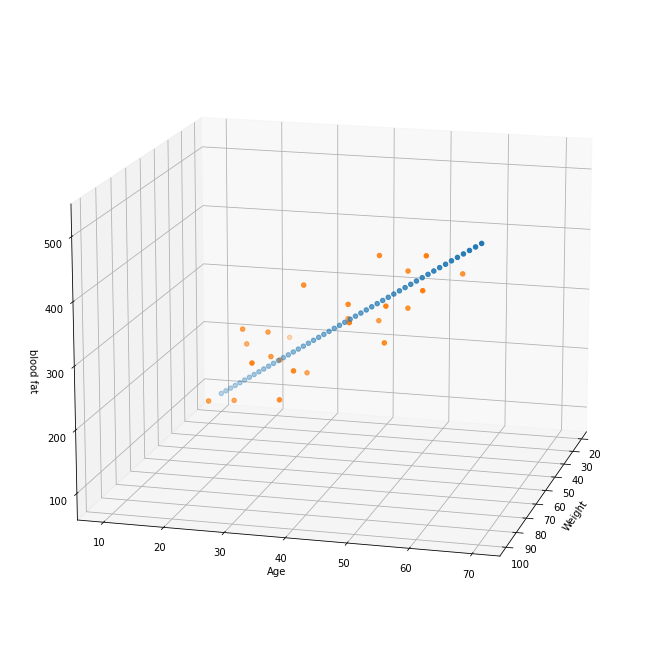

NameError: name 'x_train' is not defined

In [13]:
from mpl_toolkits.mplot3d import Axes3D
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation,Dense

raw_data = np.loadtxt("C:/000/Blood_fat.csv", delimiter=",", dtype=np.float32)

xs = np.array(raw_data[:, 0], dtype=np.float32)
ys = np.array(raw_data[:, 1], dtype=np.float32)
zs = np.array(raw_data[:, 2], dtype=np.float32)

x_data = np.array(raw_data[:,0:2], dtype=np.float32)
y_data = np.array(raw_data[:,2], dtype=np.float32)
y_data = y_data.reshape((25,1))

rmsprop = RMSprop(lr=0.01)

model = Sequential()
model.add(Dense(1,input_shape=(2,)))
model.compile(loss="mse", optimizer=rmsprop)

model.summary()

hist = model.fit(x_data, y_data, epochs=1000)

print(hist.history.keys())
# print("100kg 40세 혈중지방함량치=",model.predict(np.array([np.array([100,40]).reshape(1,2)])))
# print("60kg 25세 혈중지방함량치=",model.predict(np.array([np.array([60,25]).reshape(1,2)])))

W_,b_ = model.get_weights()
#x=np.linspace(start, stop, num). start 배열의 시작값, stop은 배열의 끝값,
#num은 start와 stop 사이를 몇 개의 일정한 간격으로 요소를 만들 것인지
#num을 생략하면 디폴드(Default)로 50개의 수열, 즉 1차원 배열을 만들어 줍니다.


#20~100까지 50개를 만듦

x = np.linspace(20,100,50).reshape(50,1)
#10~70까지 50개 만듦
y = np.linspace(10,70,50).reshape(50,1)

print("x = ",x.shape)
print("y = ",y.shape)

#Numpy 배열들을 하나로 합치는데 이용
#나이와 몸무게를 하나의 2차원 배열로 만듦
X = np.concatenate((x,y), axis=1)
print("X=", X.shape)

#예측치f
Z = np.matmul(X,W_) + b_

fig = plt.figure(figsize = (12,12))
ax = fig.add_subplot(111, projection="3d")
#예측 Data
ax.scatter(x,y,Z)
#실제 data

ax.scatter(xs, ys, zs) #ax.scatter을 통해 필요한 data를 계속 표시 가능
ax.set_xlabel("Weight")
ax.set_ylabel("Age")
ax.set_zlabel("blood fat")
ax.view_init(15,15)
plt.show()

model.fit(x_train, y_)